In [26]:
import math
import numpy as np
import codecs, json 
import cv2
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import mixture
from scipy import linalg as la
from scipy import stats as st
from scipy.interpolate import griddata

In [892]:
# path = '25.txt'
# arr1 = np.zeros([100,8,8])
# with open(path) as f:
#     for k in range(100):
#         for i in range(8):
#             line = f.readline()
#             t = [float(x) for x in line.split()]
#             arr1[k,i] = t
#         line = f.readline()

rn = 100
path = 'train/warm/output-1/1.txt'
arr1 = np.zeros([rn,8,8])
with open(path) as f:
    for k in range(rn):
        for i in range(8):
            line = f.readline()
            t = [float(x) for x in line.split()]
            arr1[k,i] = t
        line = f.readline()

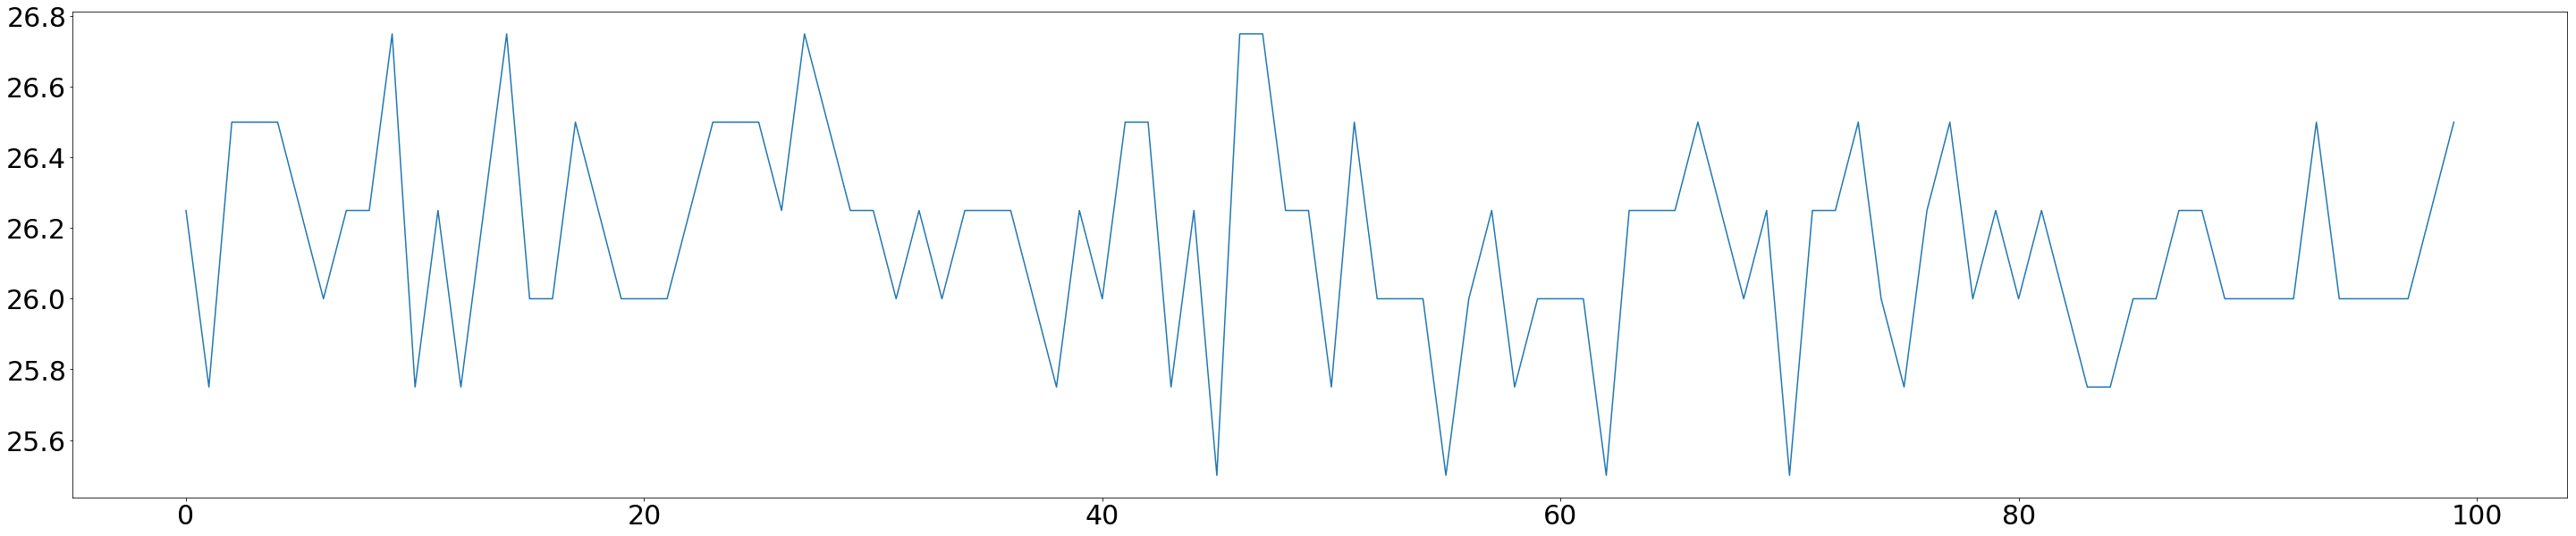

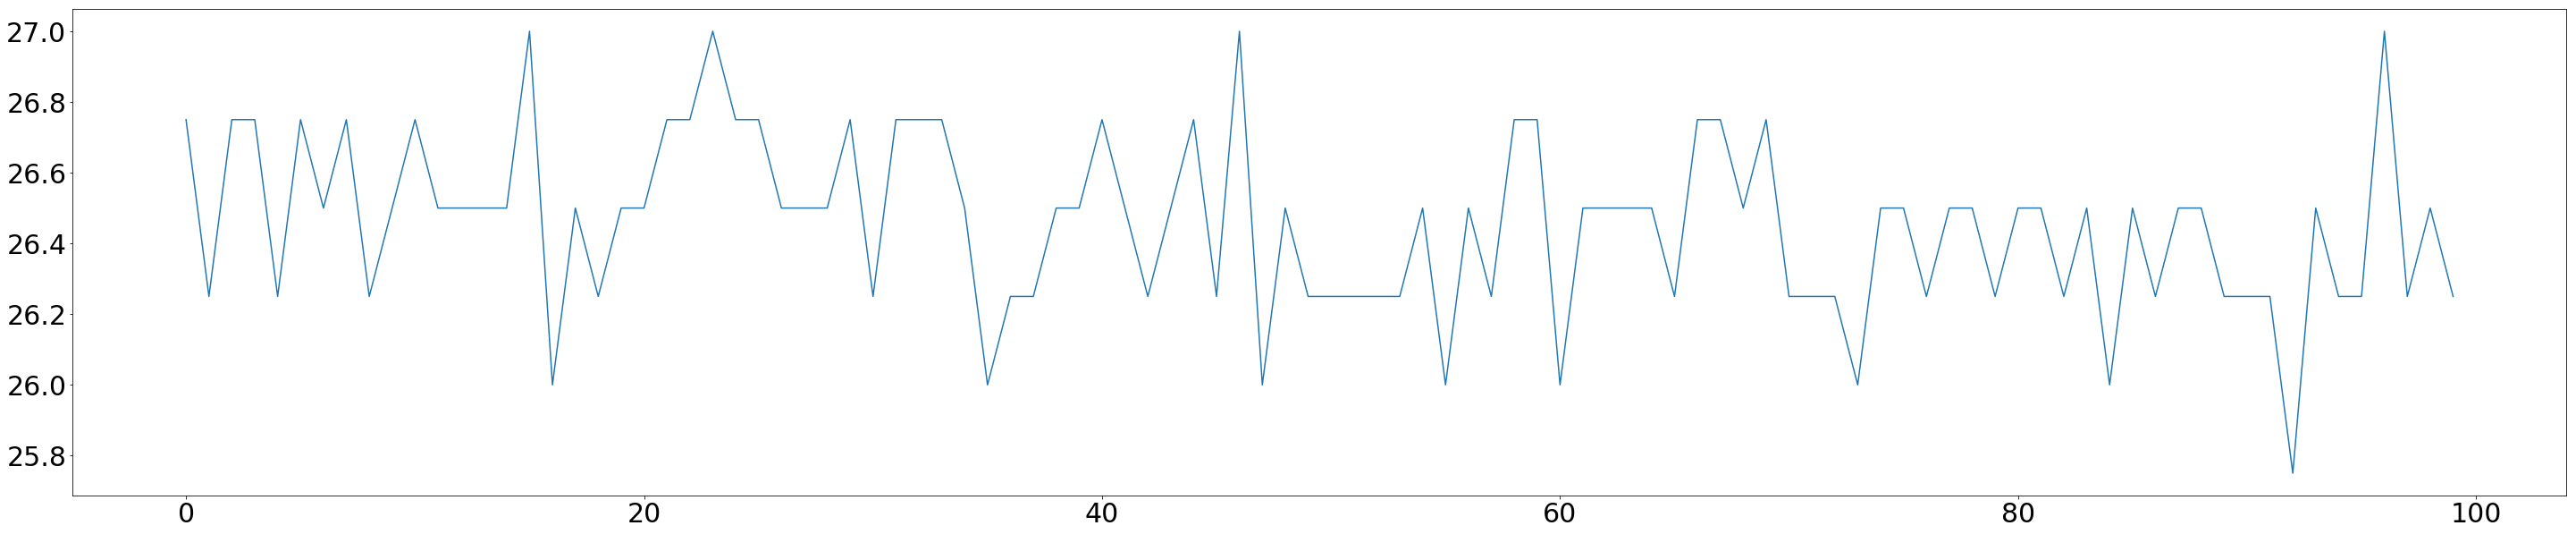

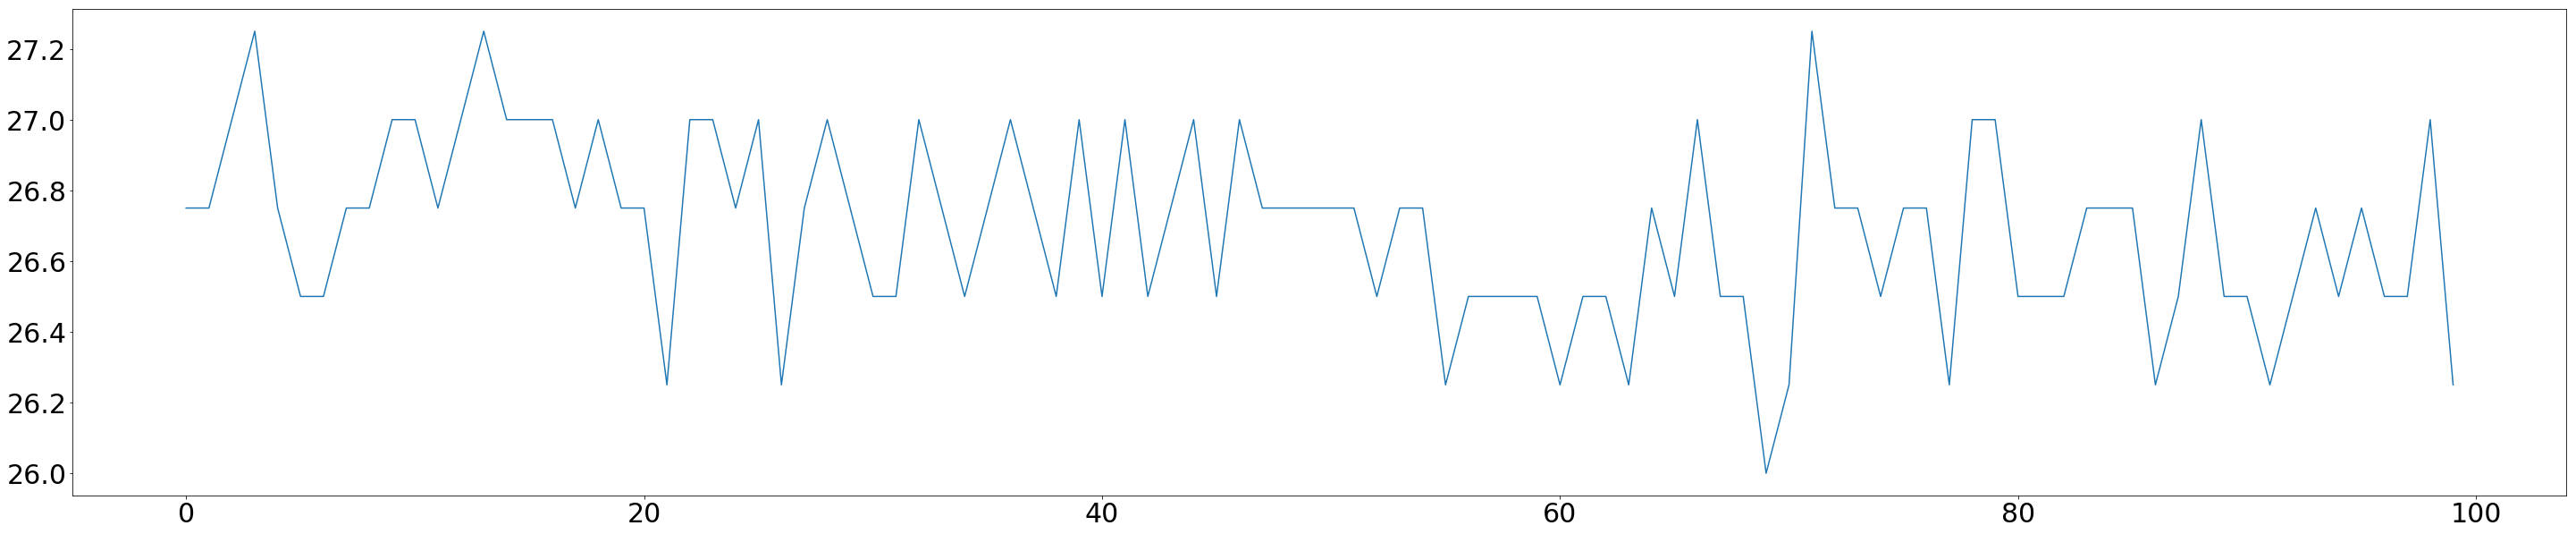

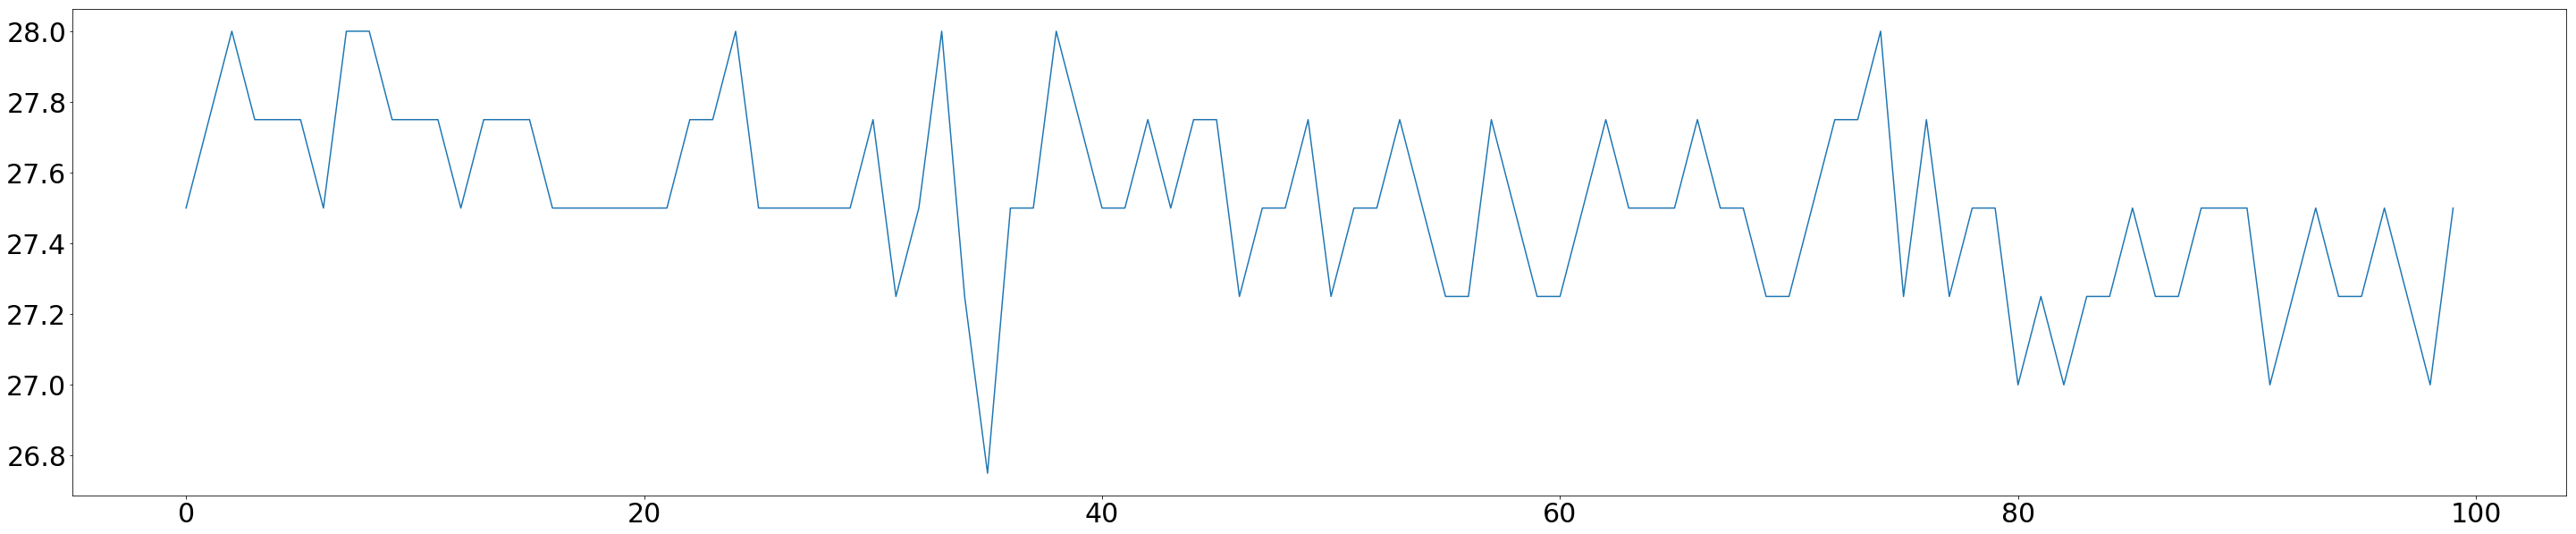

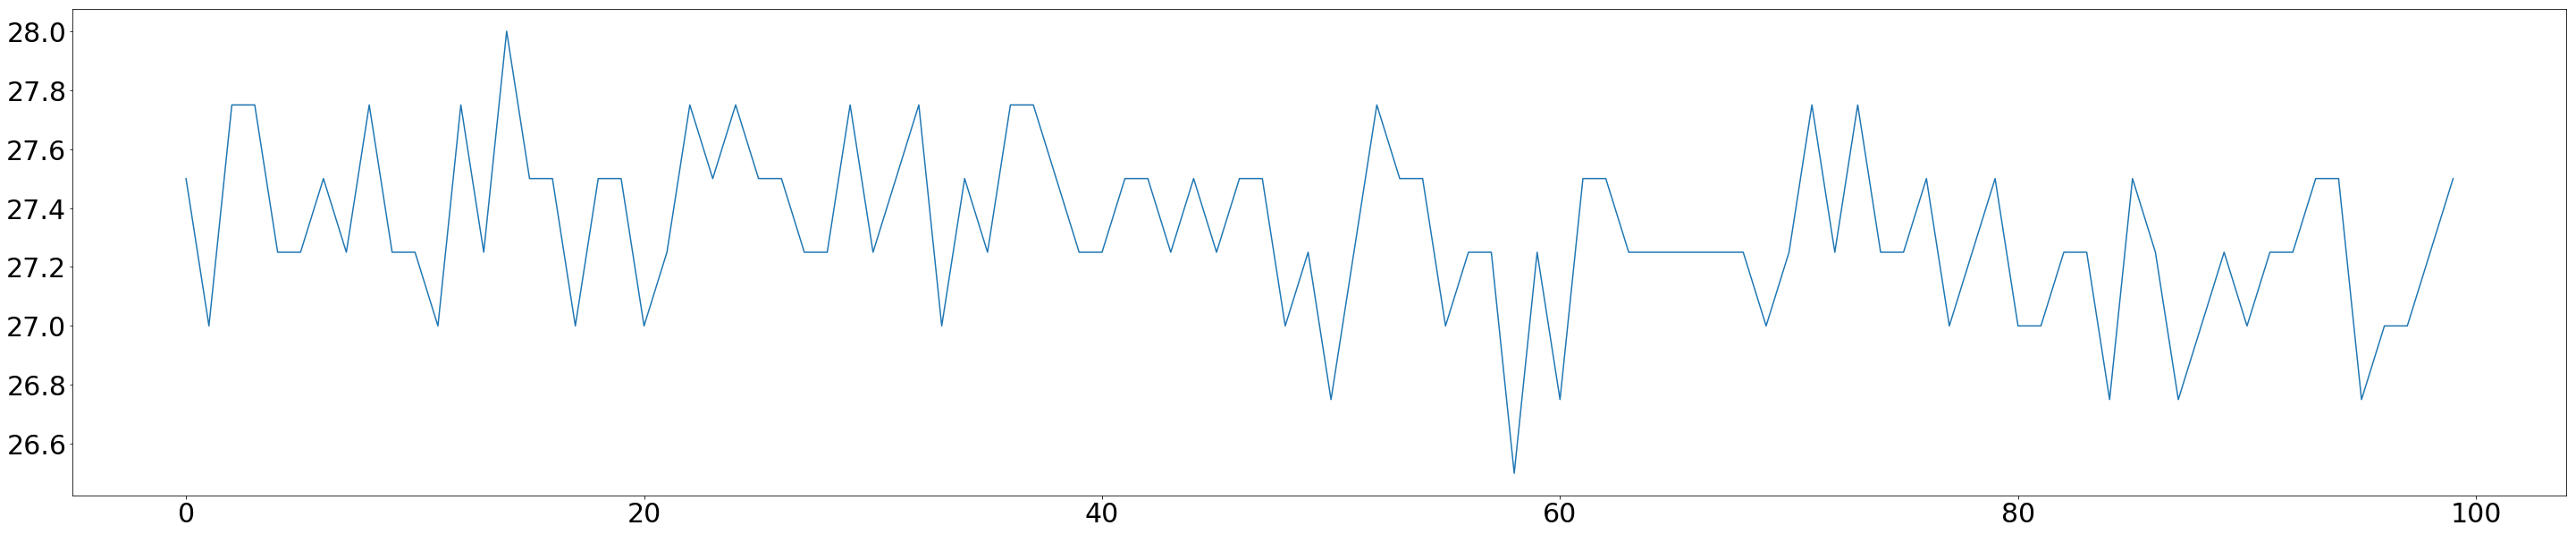

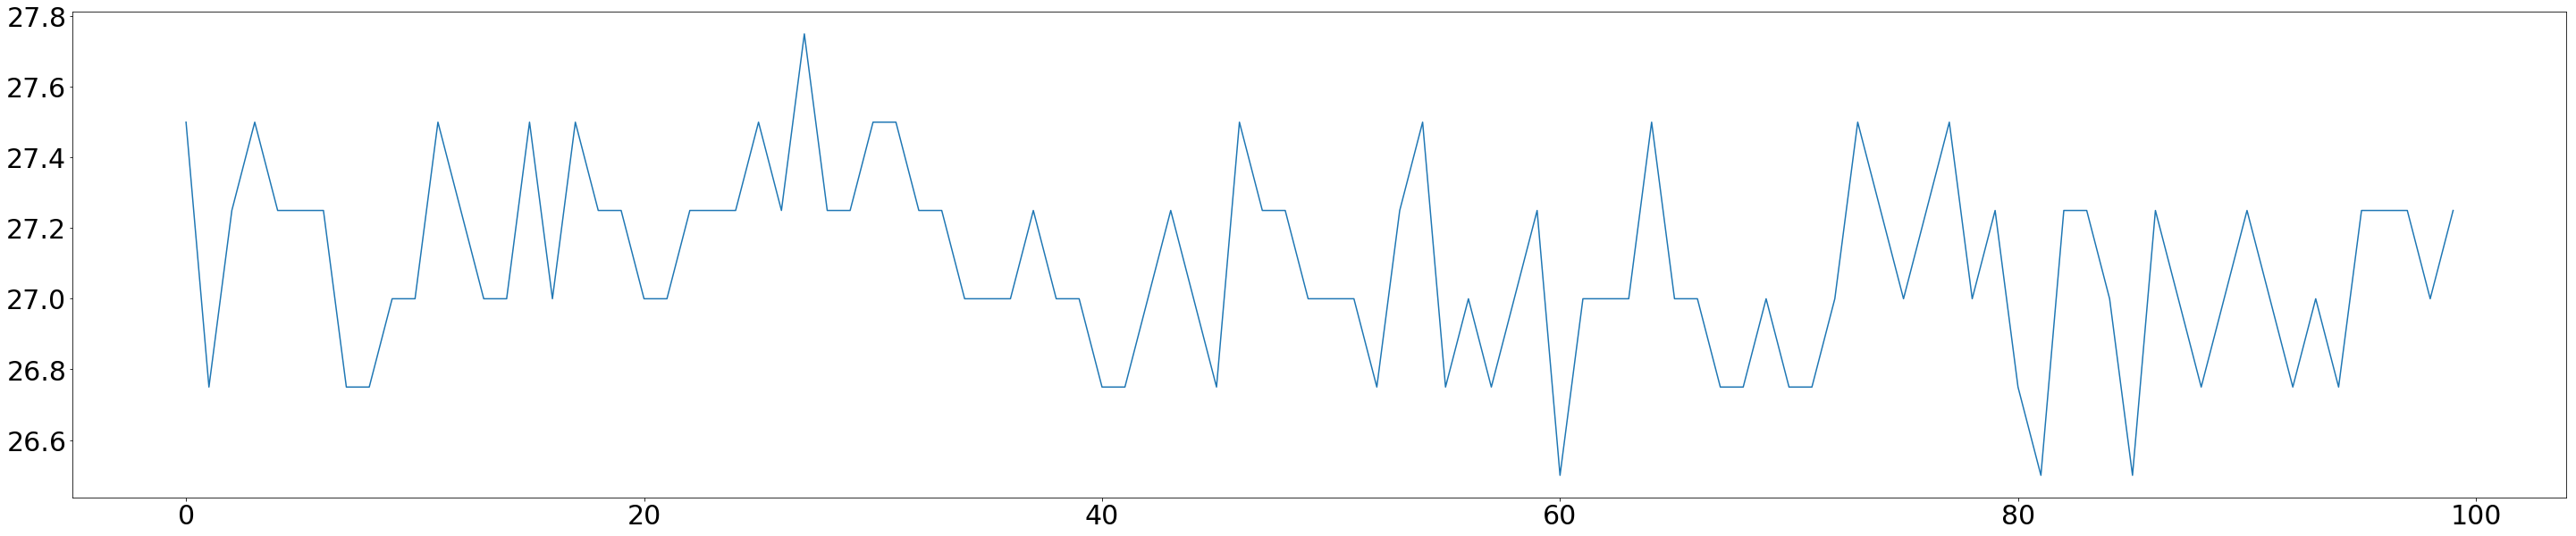

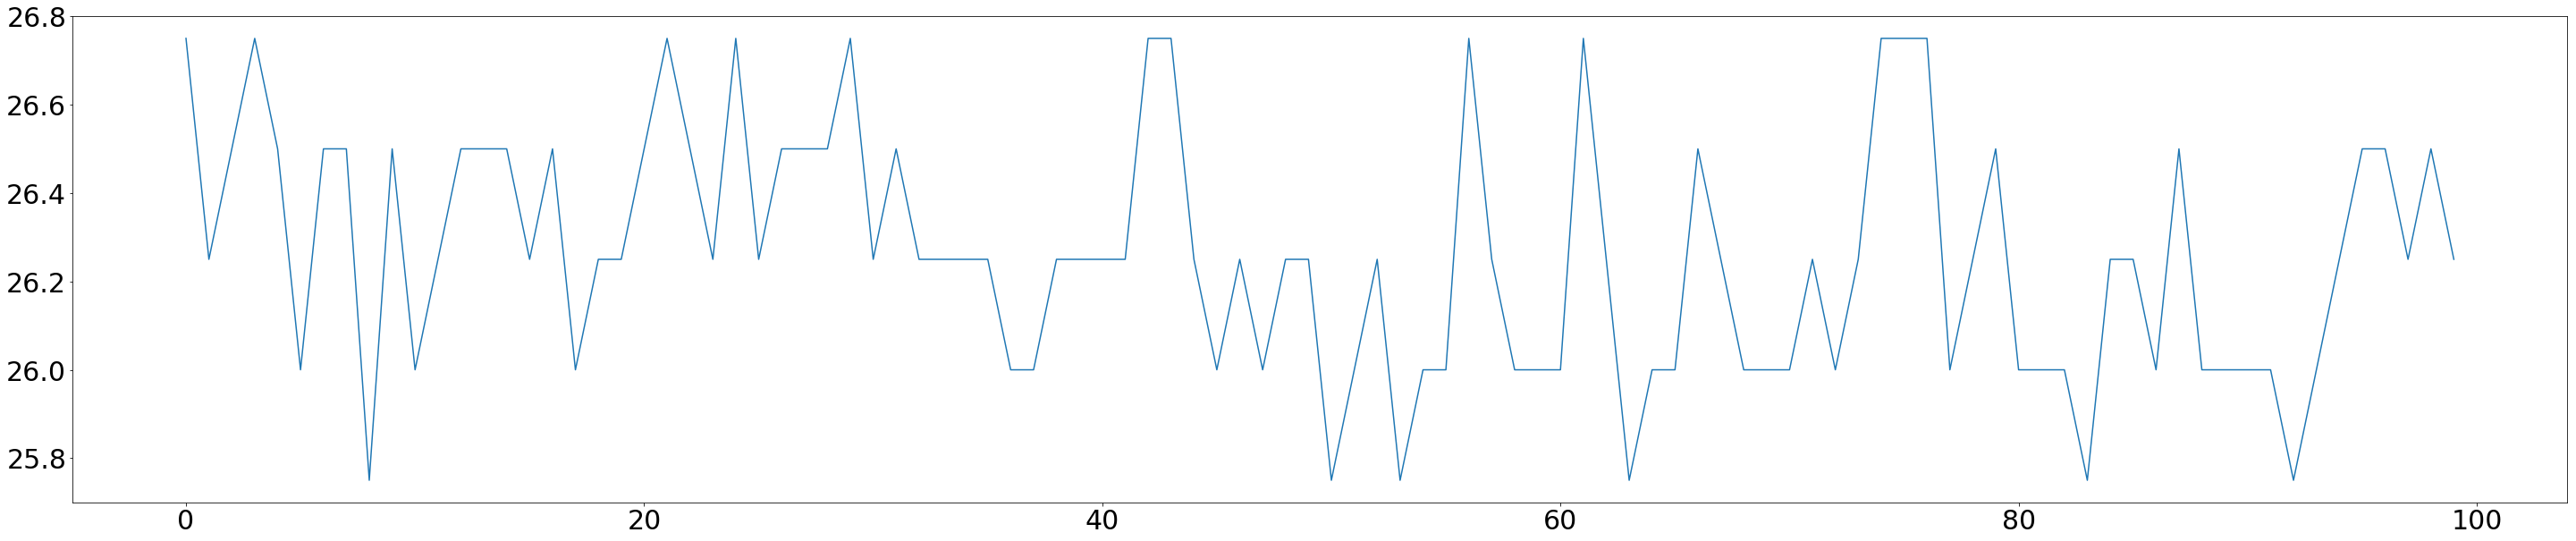

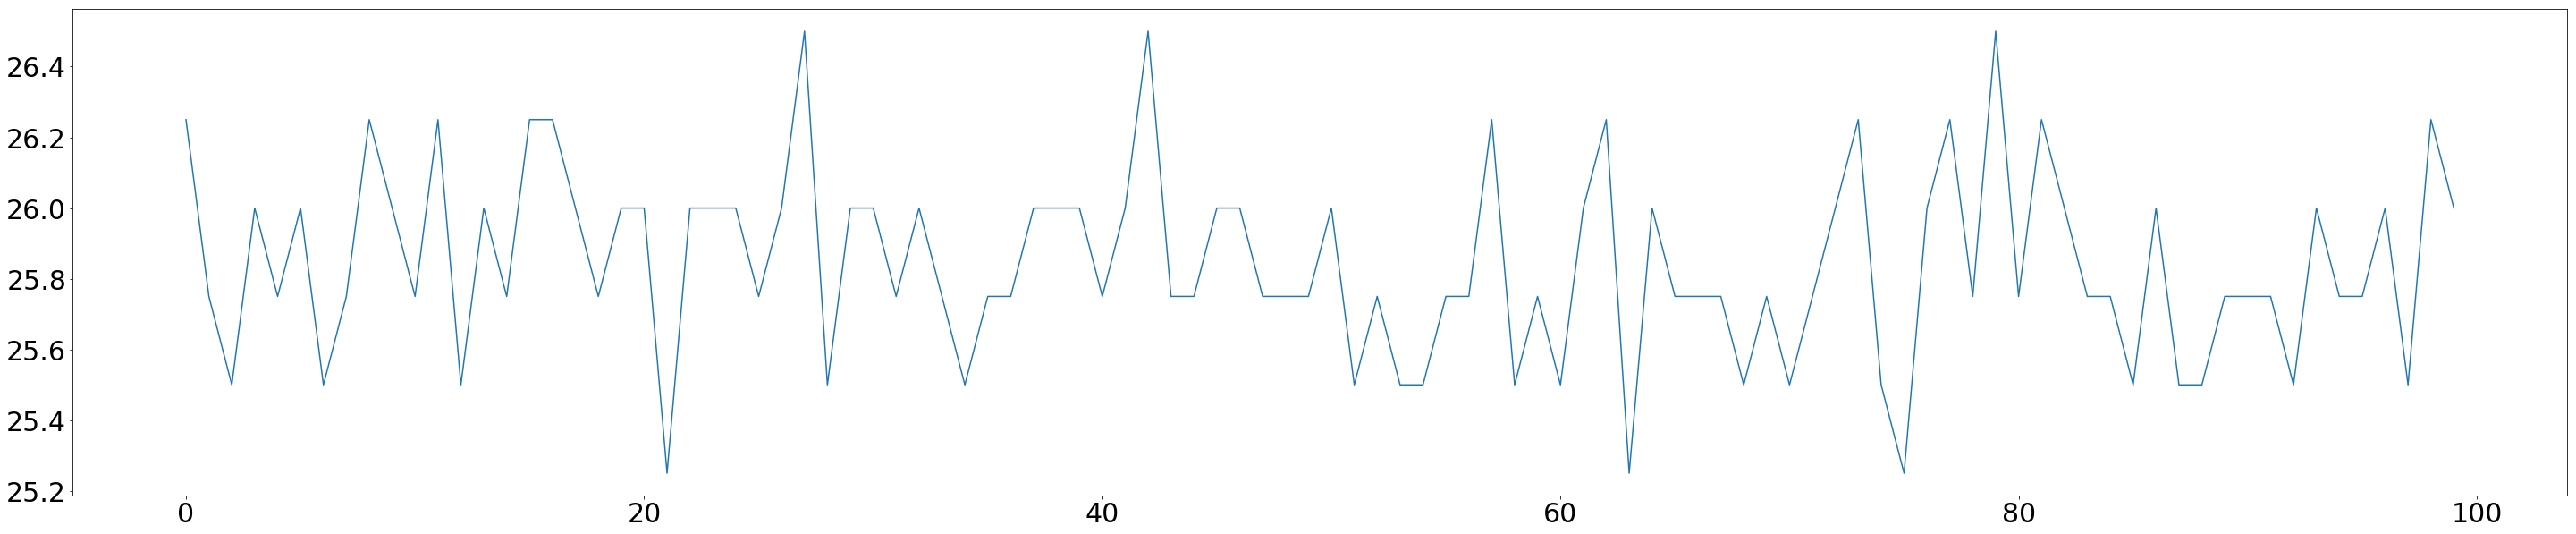

In [893]:
for i in range(0,8,1):
    plt.figure(figsize=(50, 10))
    plt.rc('xtick', labelsize=30) 
    plt.rc('ytick', labelsize=30) 
    plt.plot(arr1[:,i,0])
#     print(np.mean(arr1[:,i,0]))

In [894]:
# running_ave = np.mean(arr1.reshape(-1,10,8,8),axis = 1)

# for j in range(10):
#     for i in range (j+1,running_ave.shape[0]):
#         running_ave[i] = (running_ave[i]+running_ave[i-1])*0.5

running_ave = np.copy(arr1)
pp = 2
for i in range (1,running_ave.shape[0]):
    running_ave[i] = running_ave[i]*math.pow(0.5,min(pp,i))+running_ave[i-1]*(1-math.pow(0.5,min(pp,i)))
    

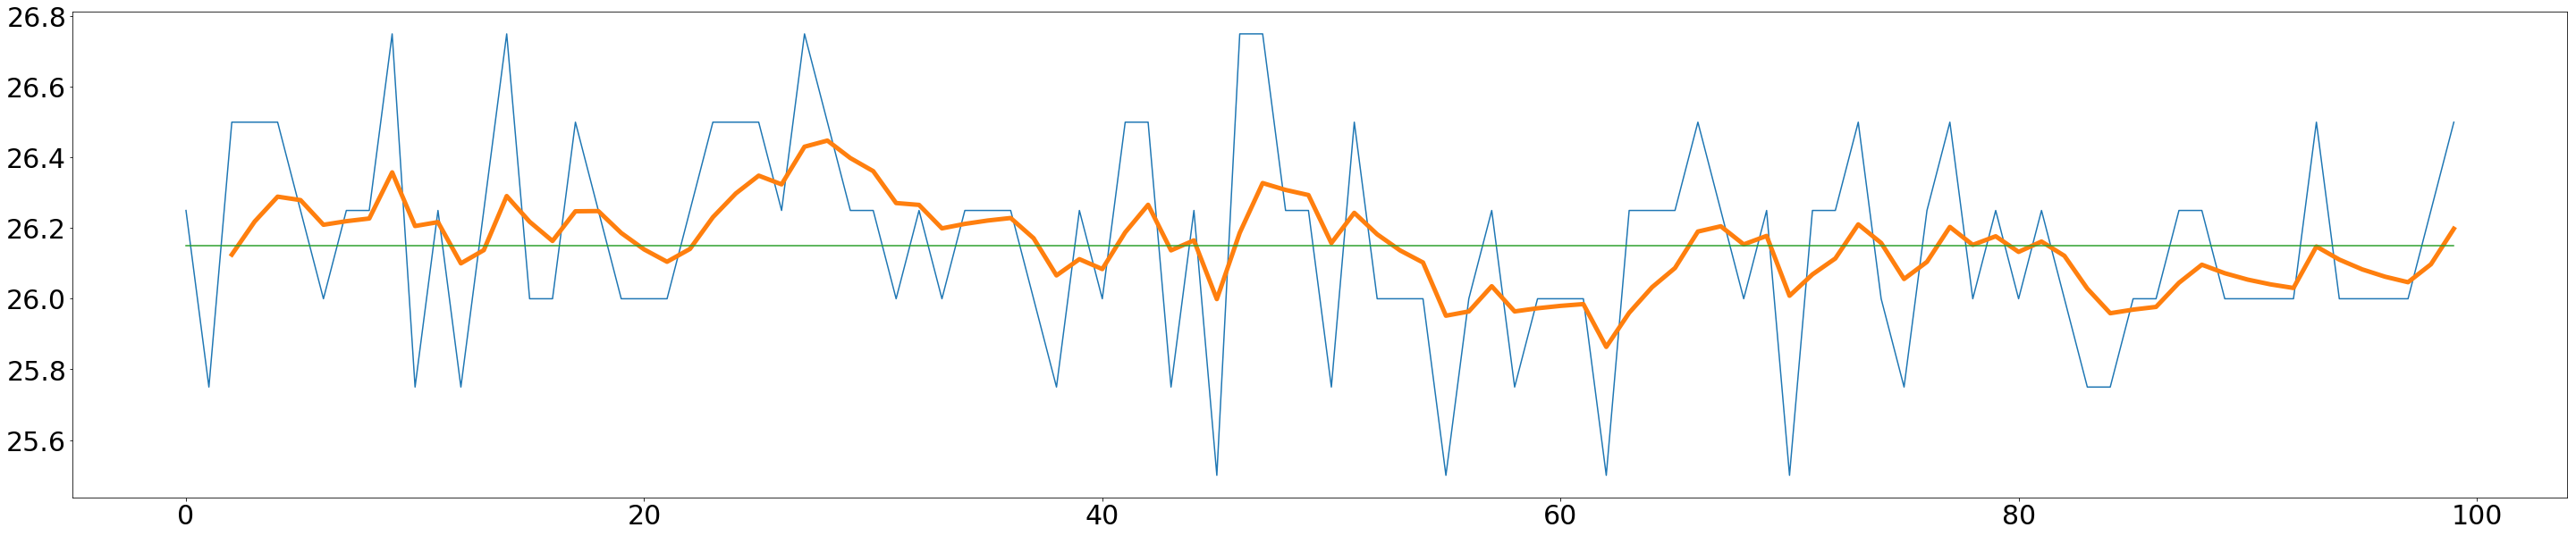

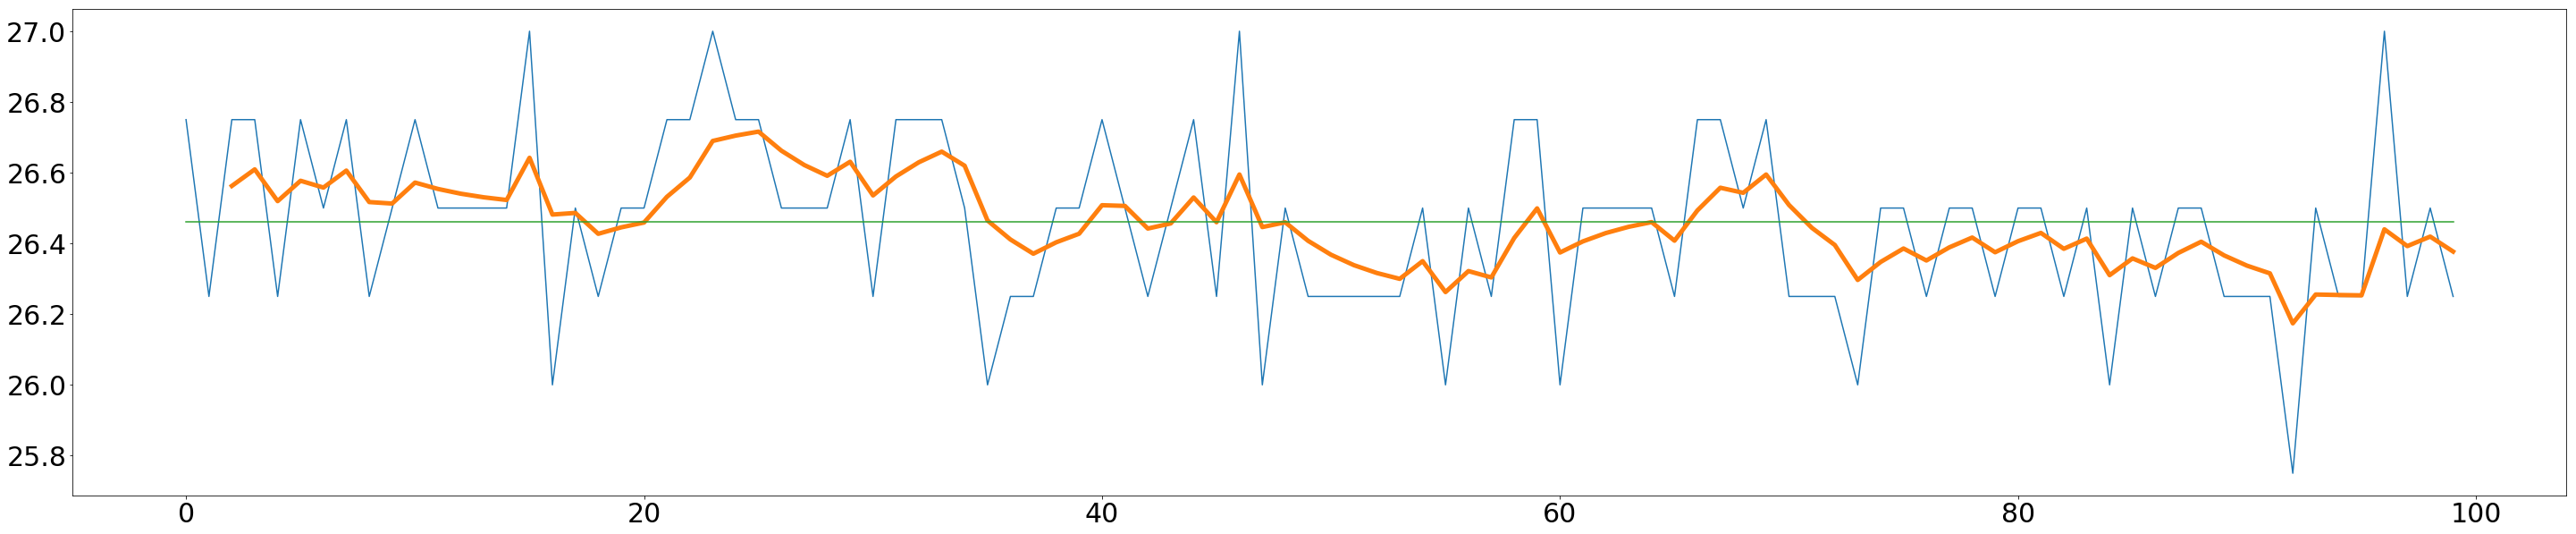

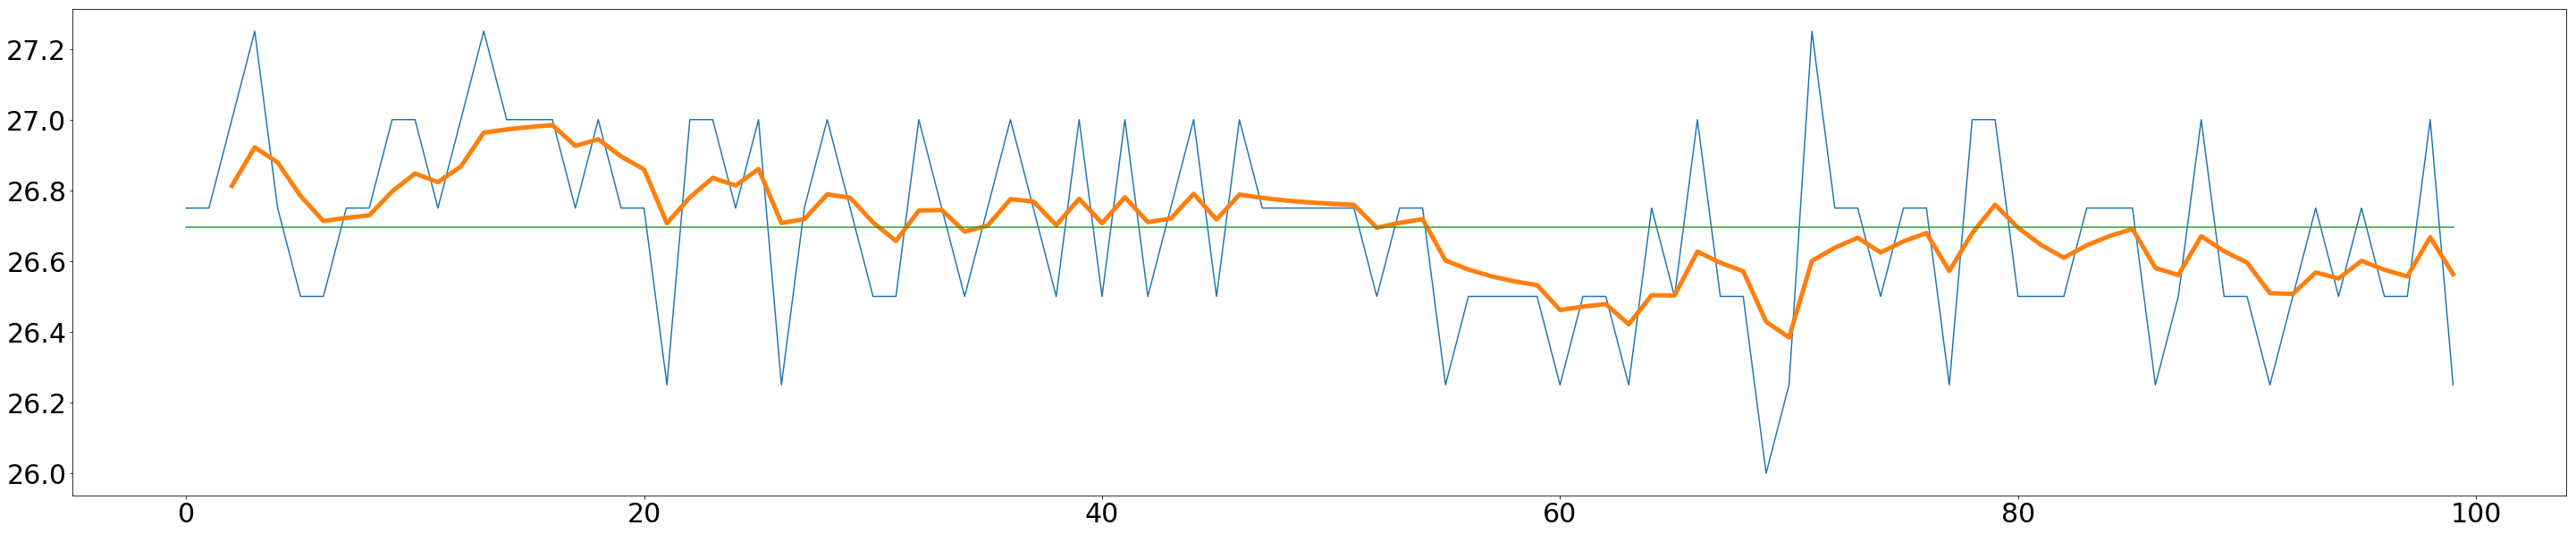

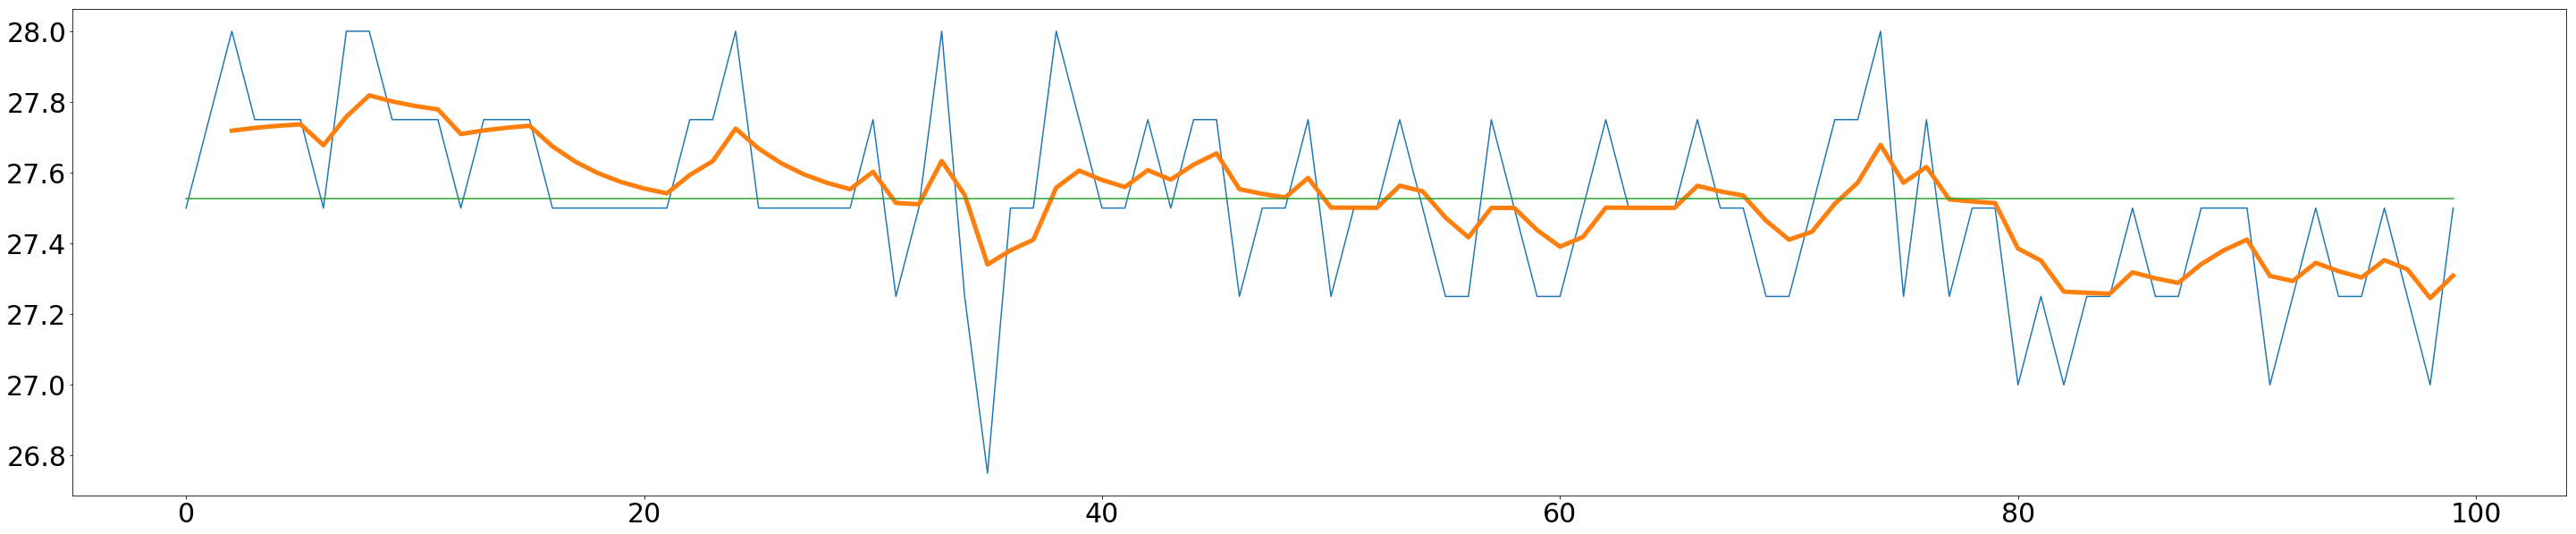

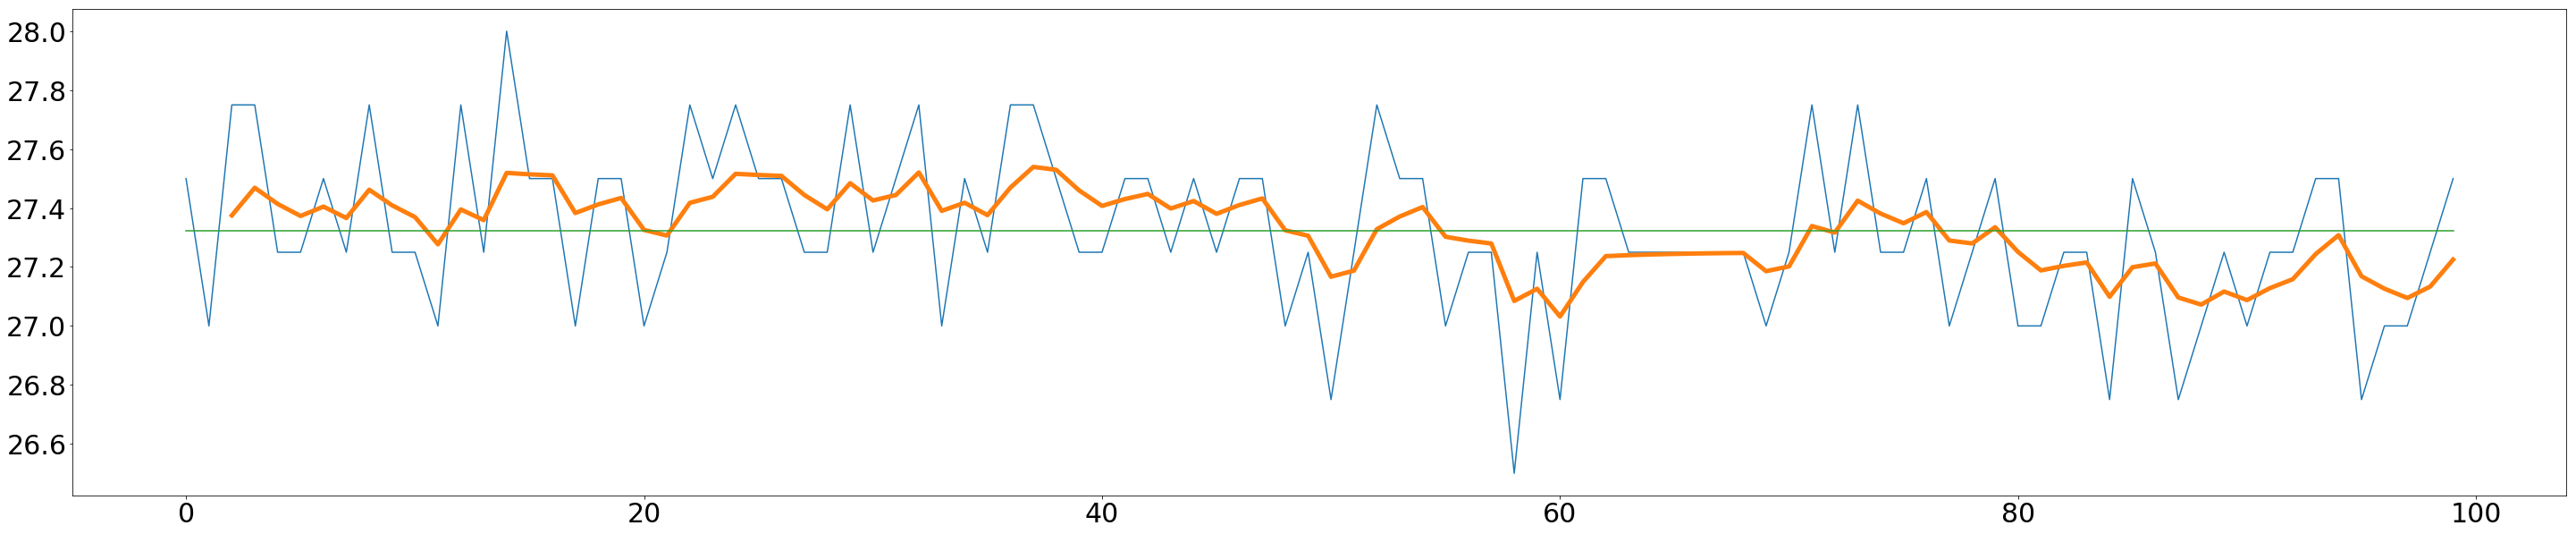

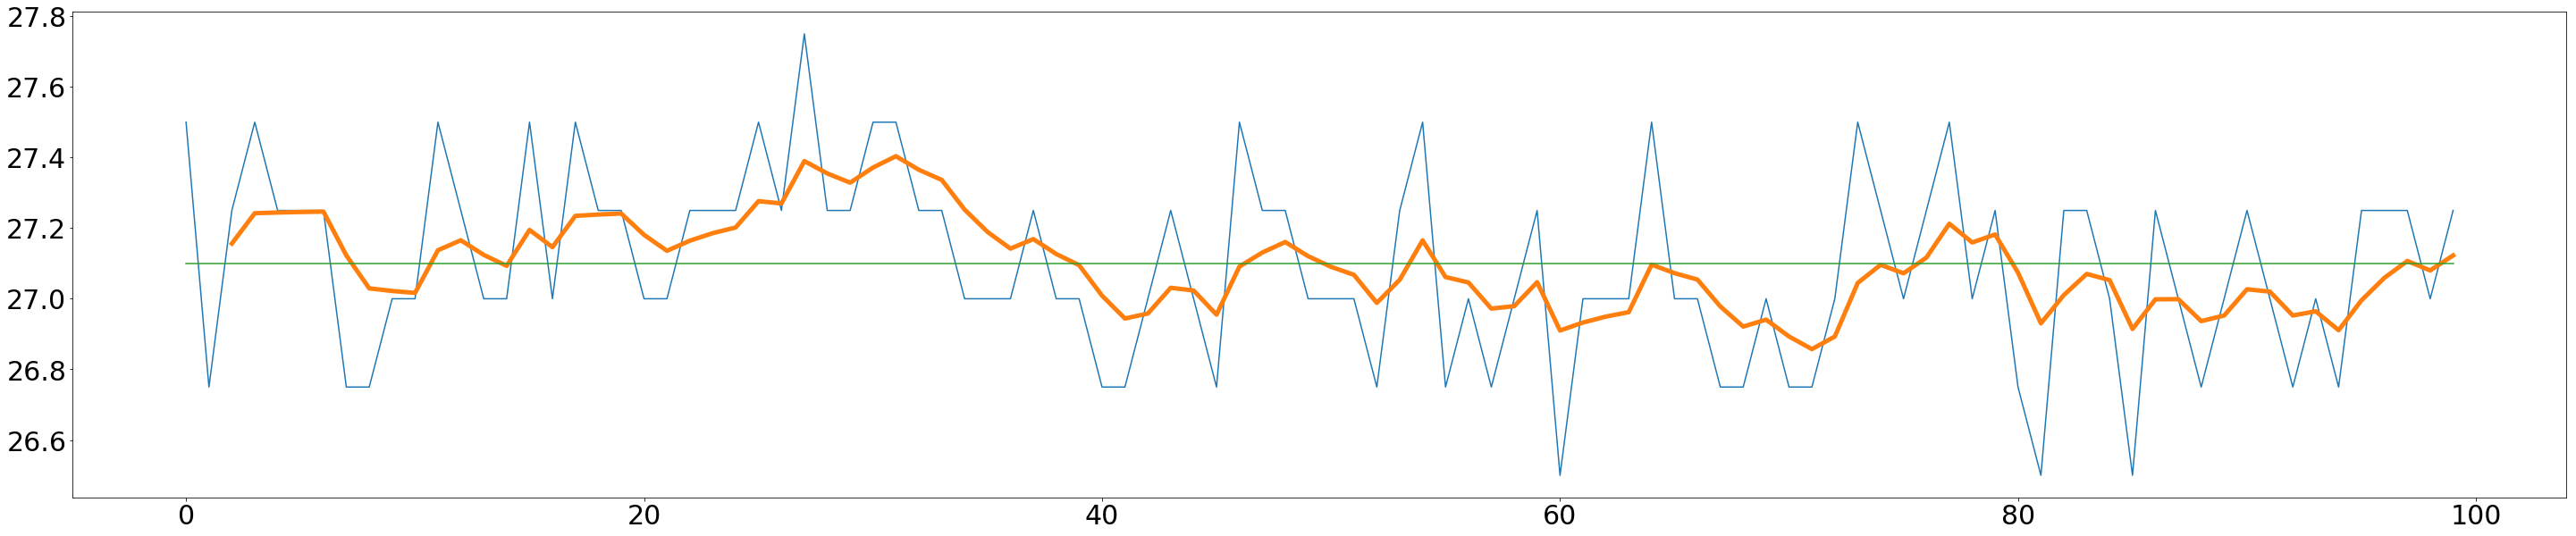

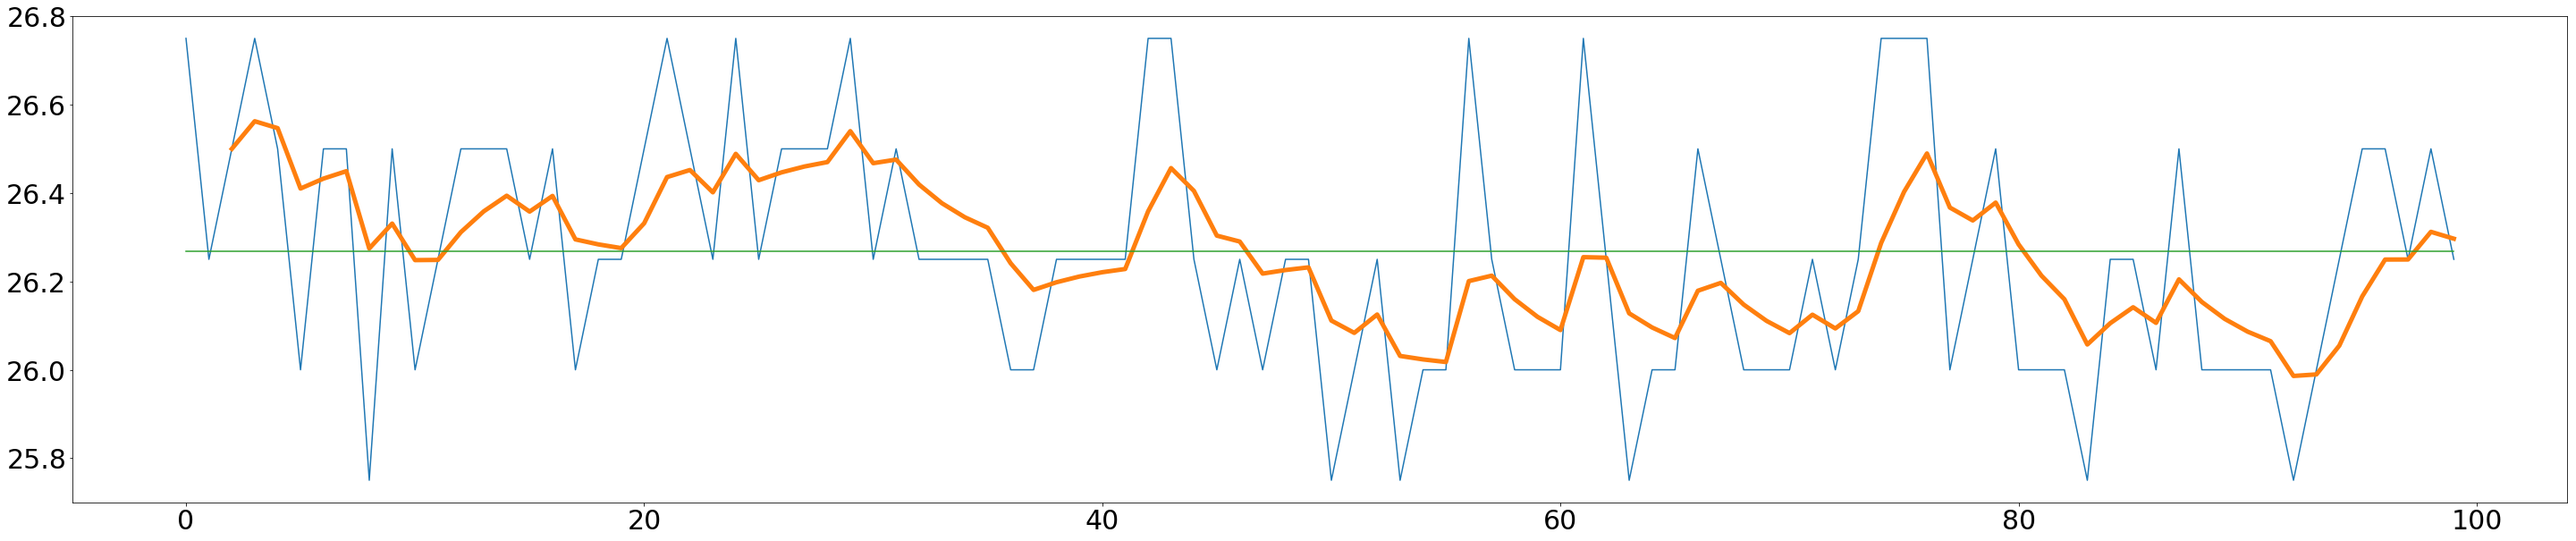

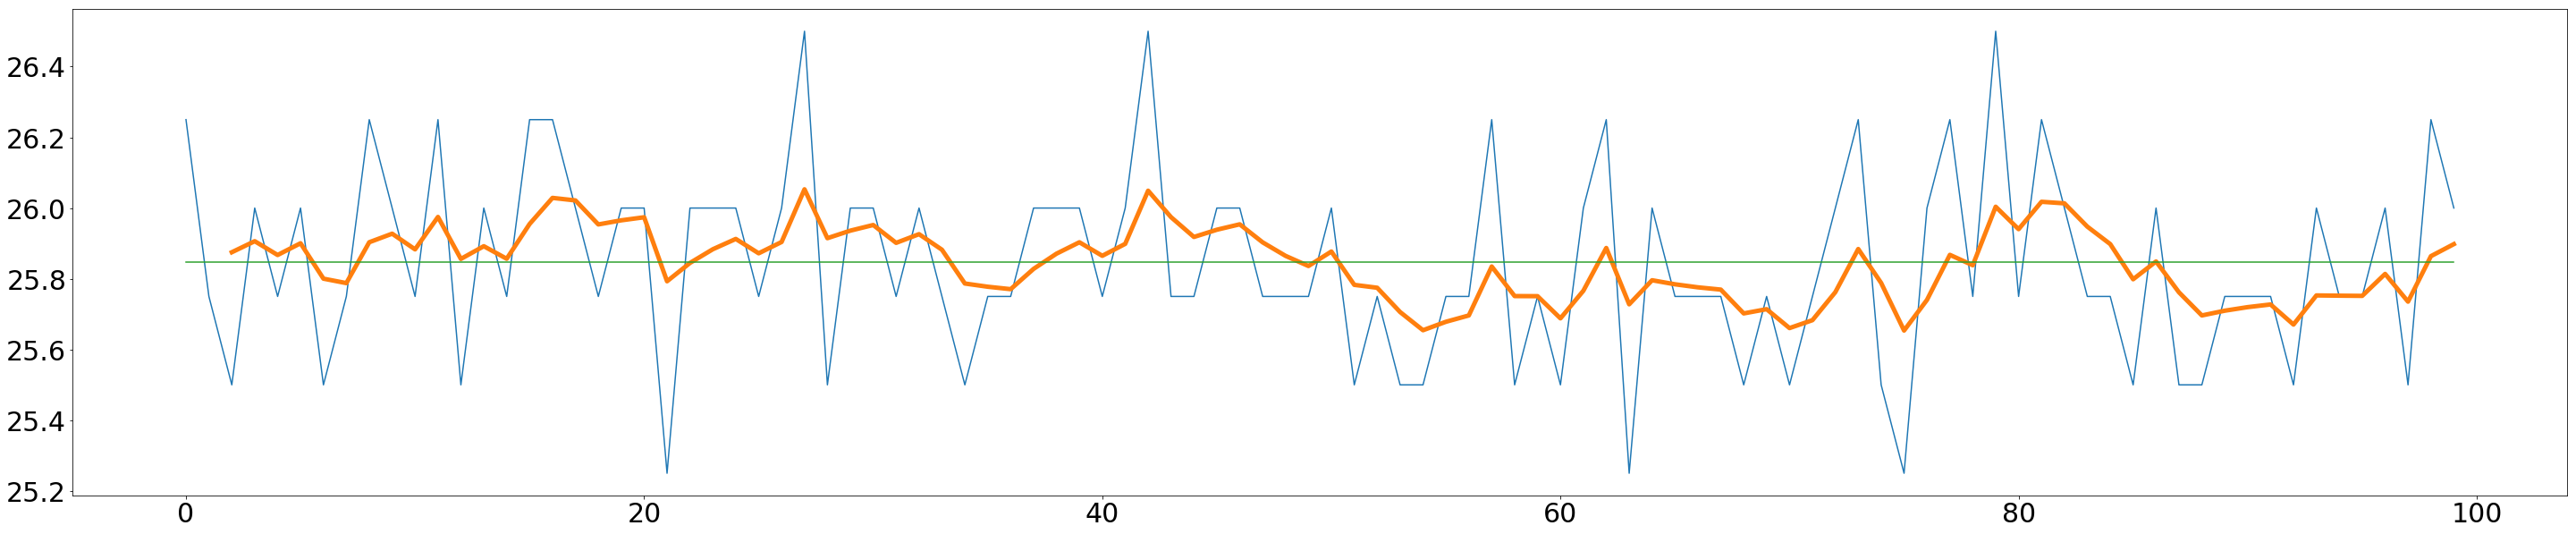

In [895]:
for i in range(0,8,1):
    plt.figure(figsize=(50, 10))
    plt.rc('xtick', labelsize=30) 
    plt.rc('ytick', labelsize=30) 
    plt.plot(arr1[:,i,0])
    plt.plot(np.arange(pp,running_ave.shape[0]),running_ave[pp:,i,0], lw = 5)
    plt.plot(np.mean(running_ave[:,i,0])*np.ones(running_ave.shape[0]))
#     print(np.mean(running_ave[:,i,0]))

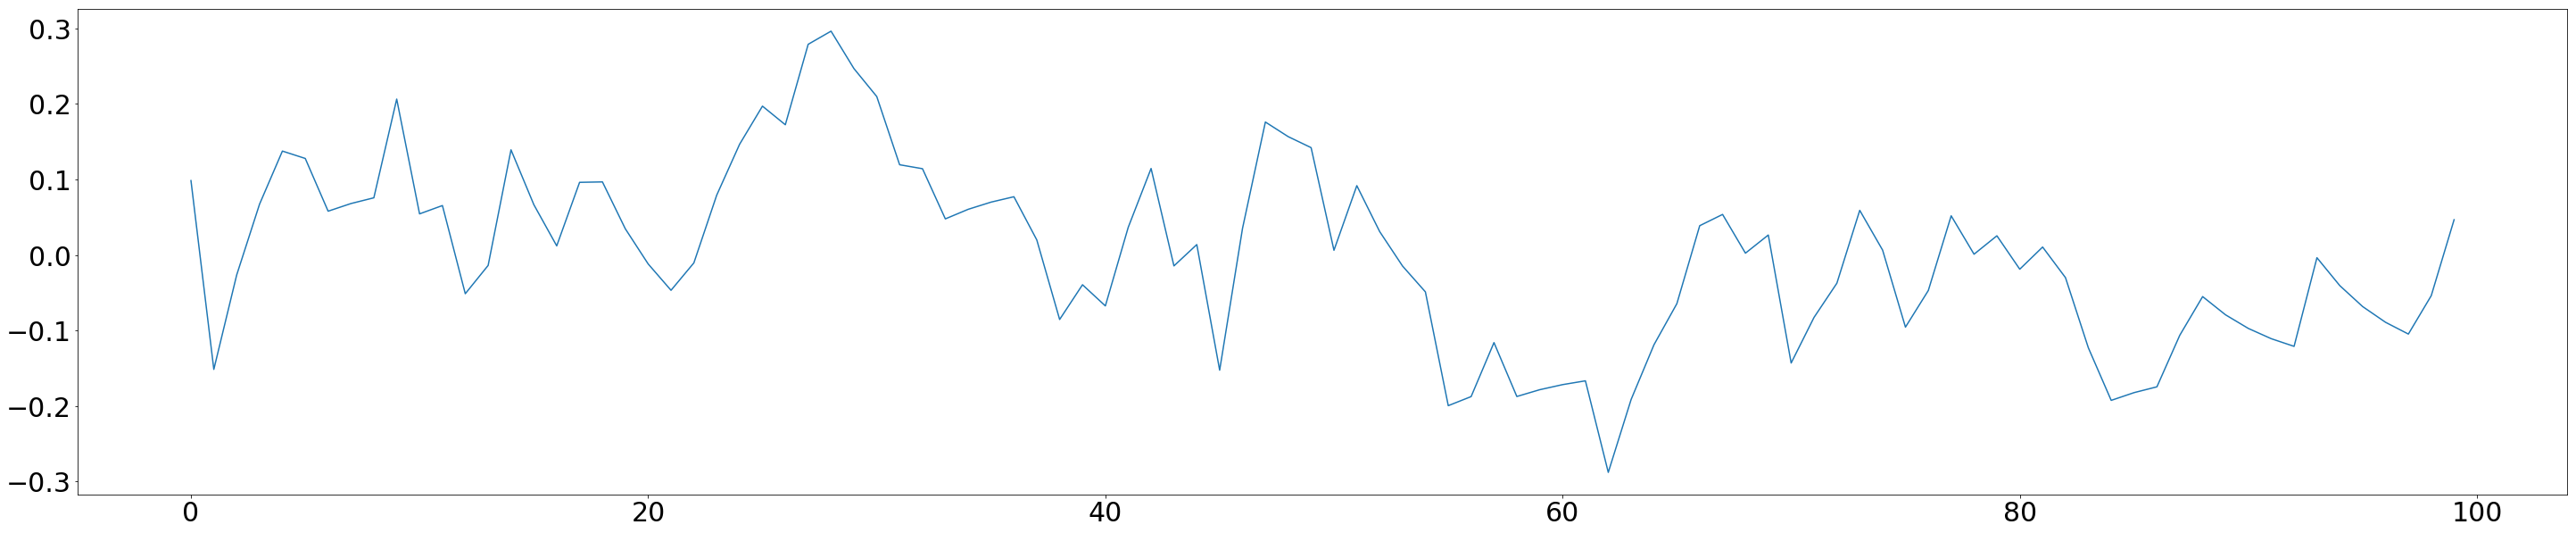

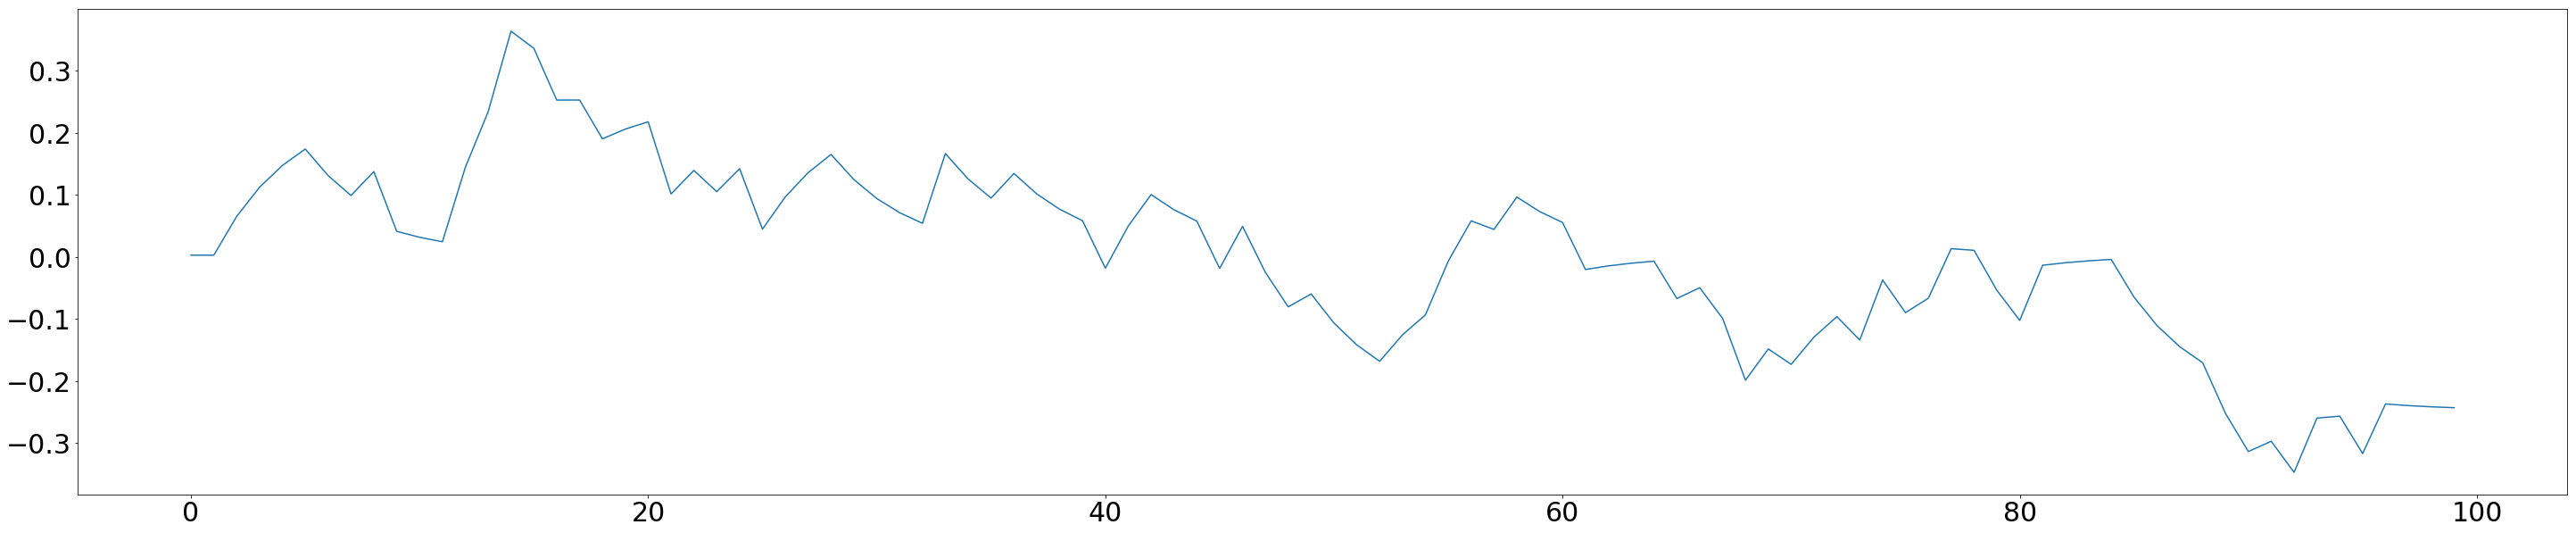

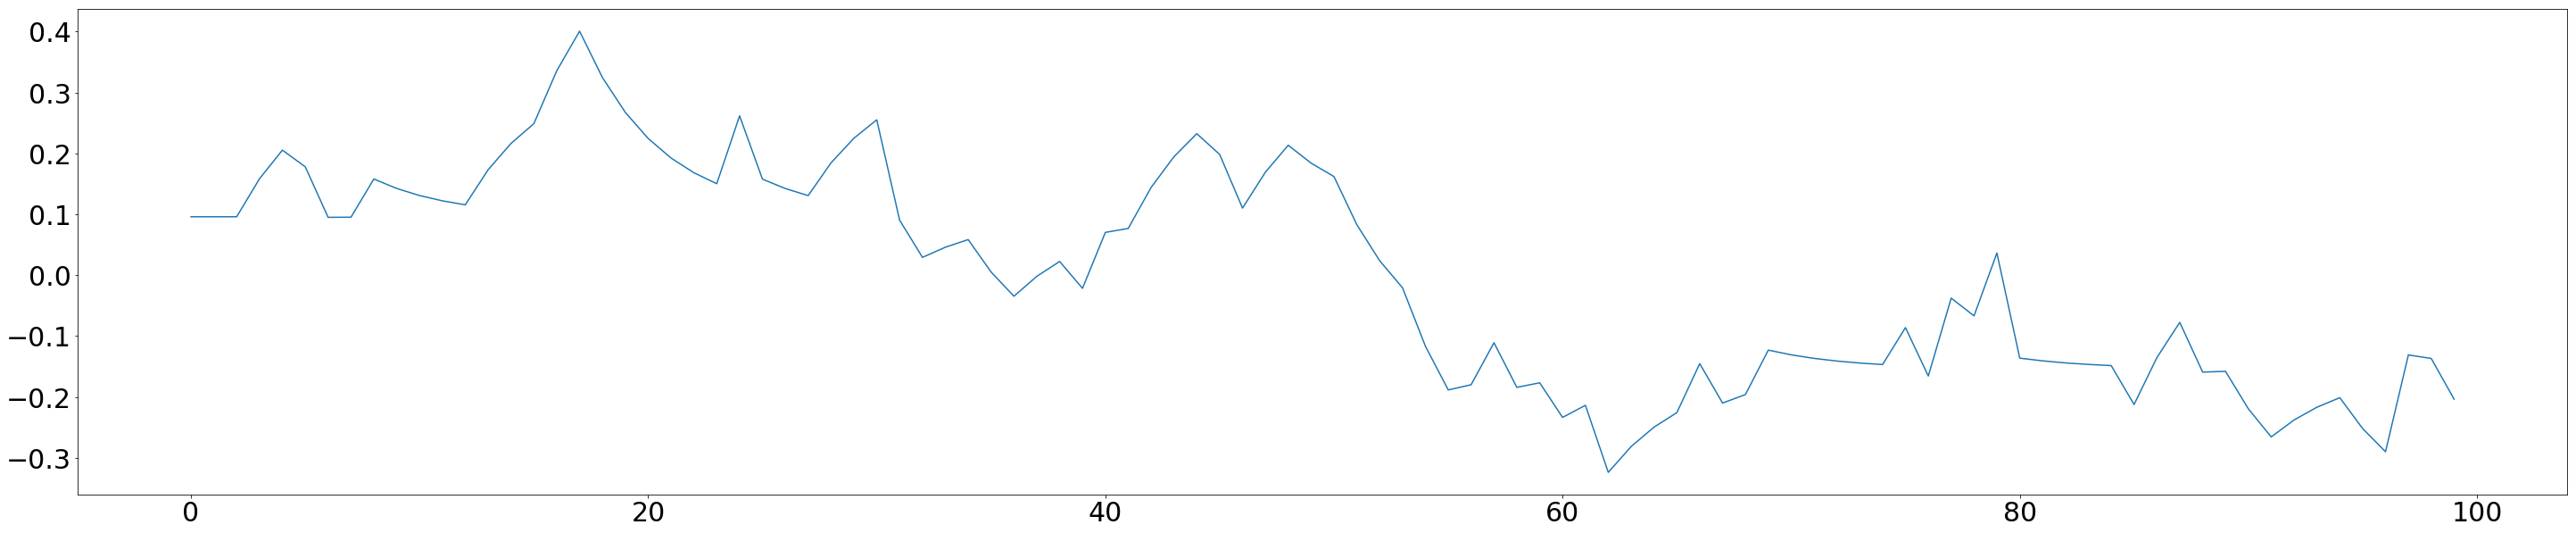

In [896]:
time_mean = np.mean(running_ave,axis = 0)
centralized = running_ave-time_mean.reshape(1,8,8)

for i in range(0,8,3):
    plt.figure(figsize=(50, 10))
    plt.rc('xtick', labelsize=30) 
    plt.rc('ytick', labelsize=30) 
    plt.plot(centralized[:,i,i])
#     plt.plot(np.zeros(100))

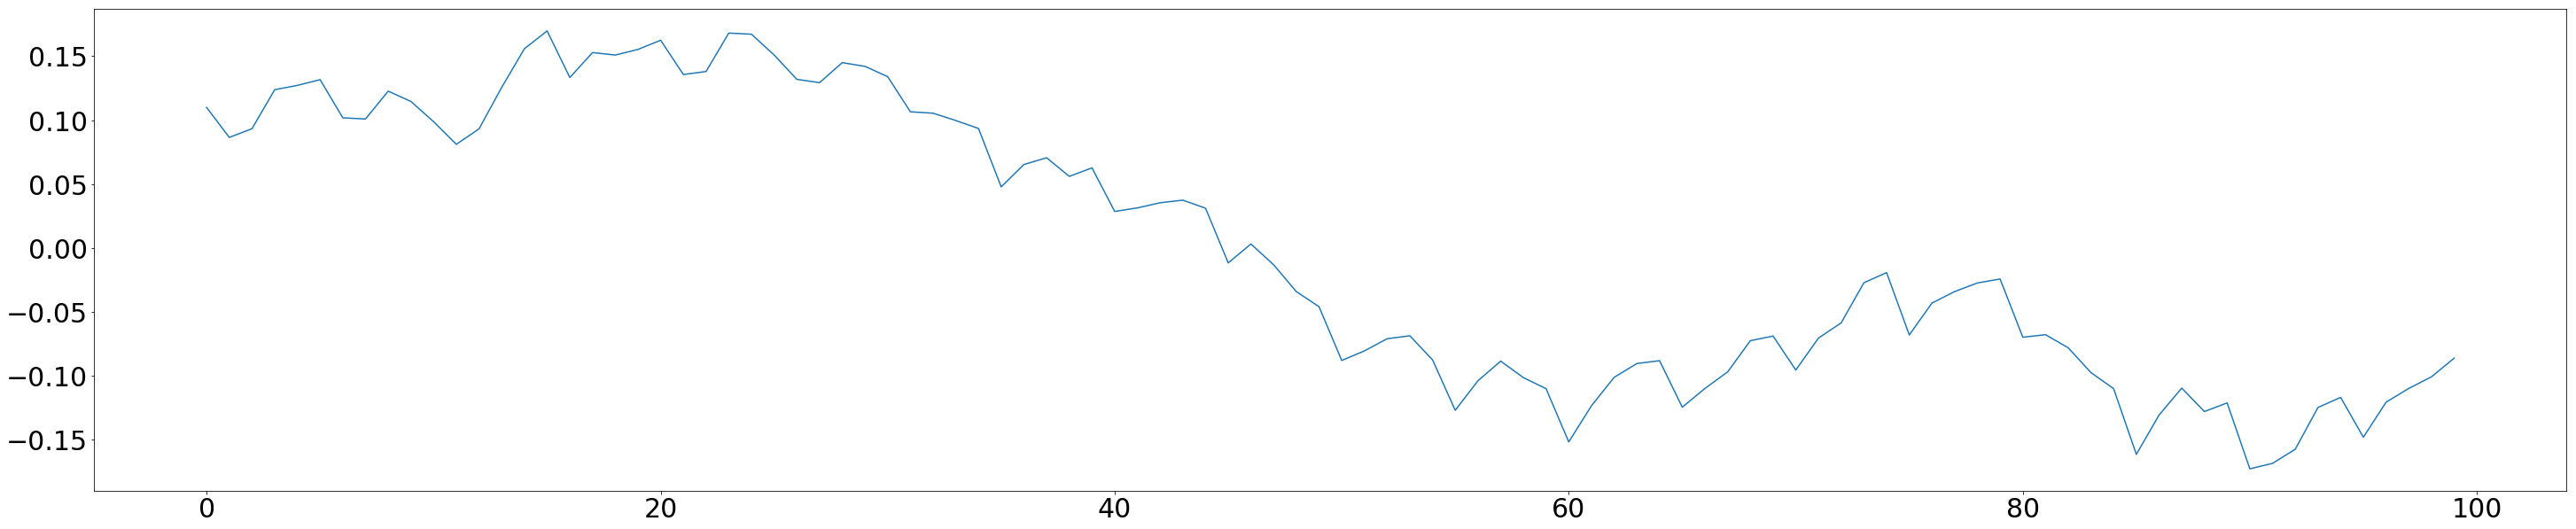

In [897]:
ambient_noise = np.mean(centralized, axis = (1,2))
plt.figure(figsize=(50, 10))
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.plot(ambient_noise)
# plt.plot(np.zeros(100))
plt.show()

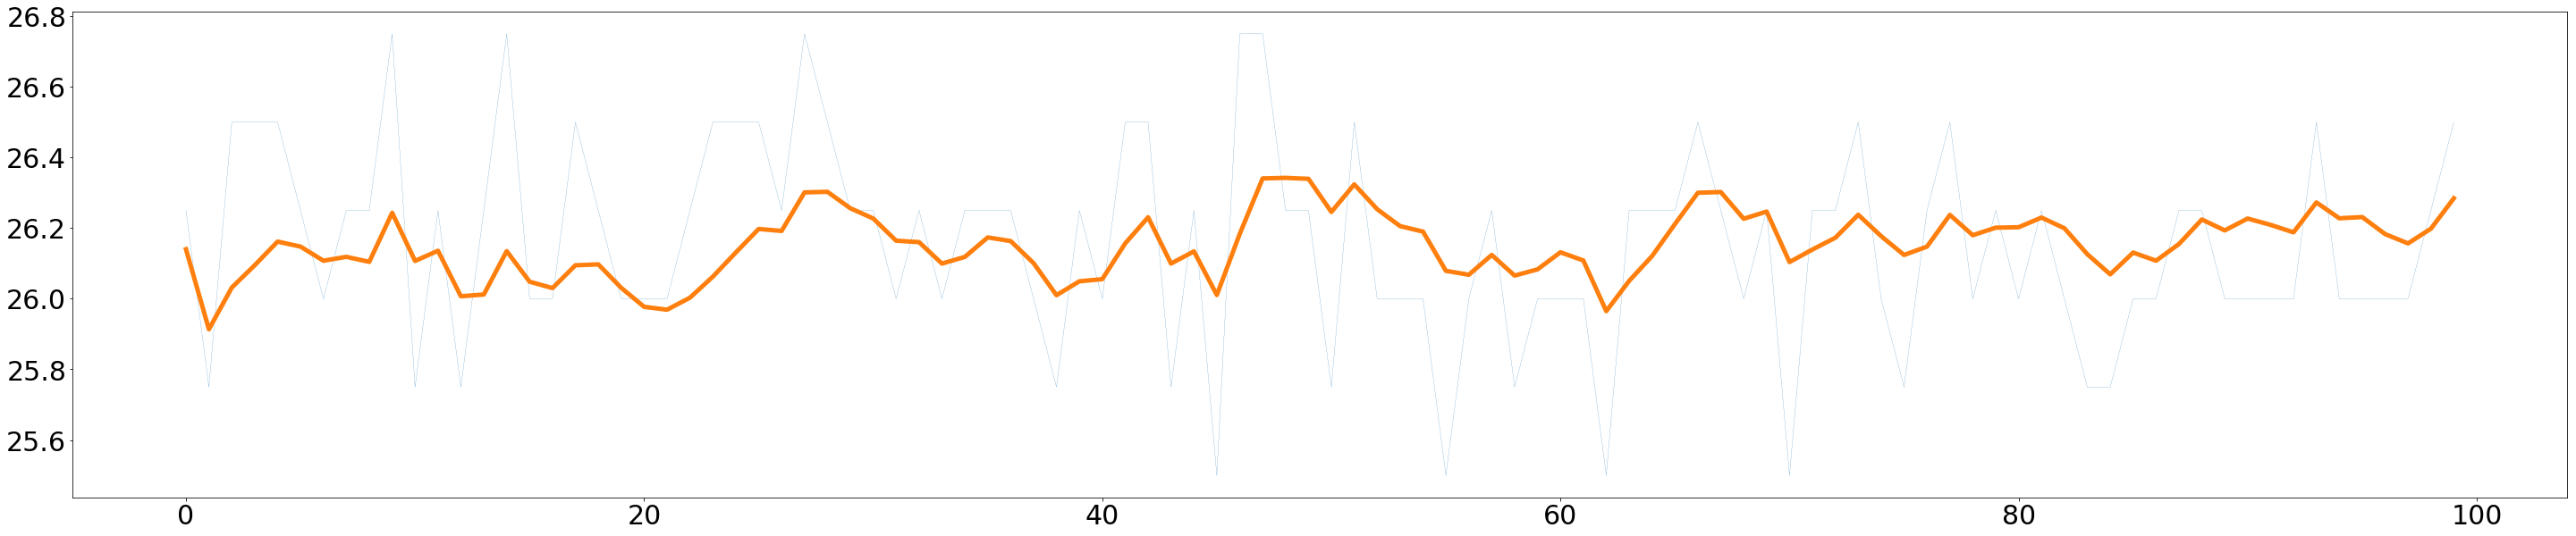

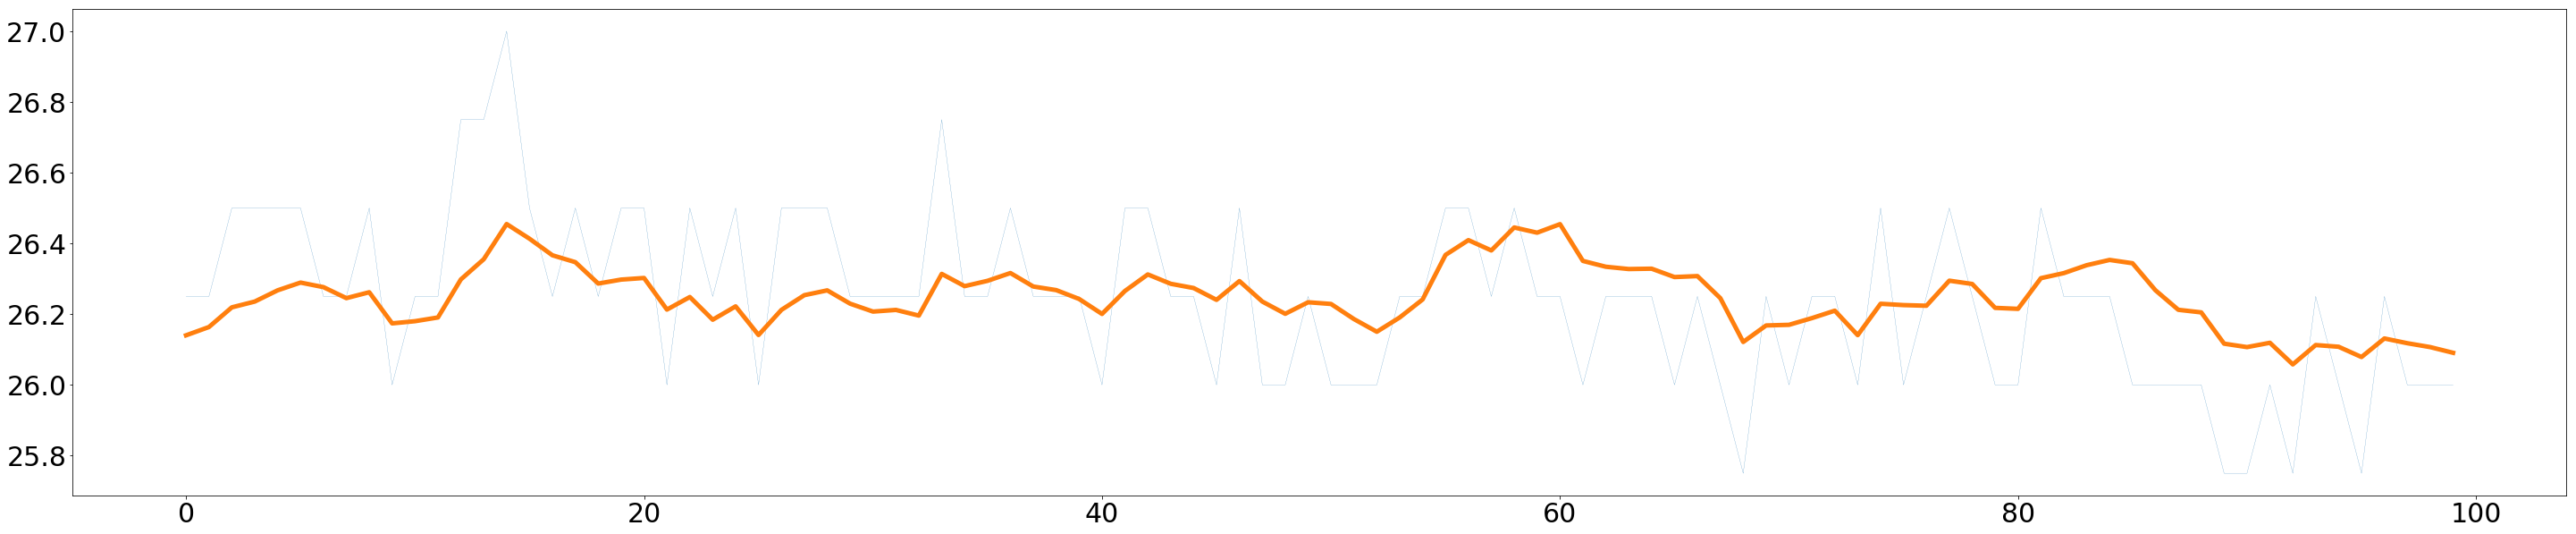

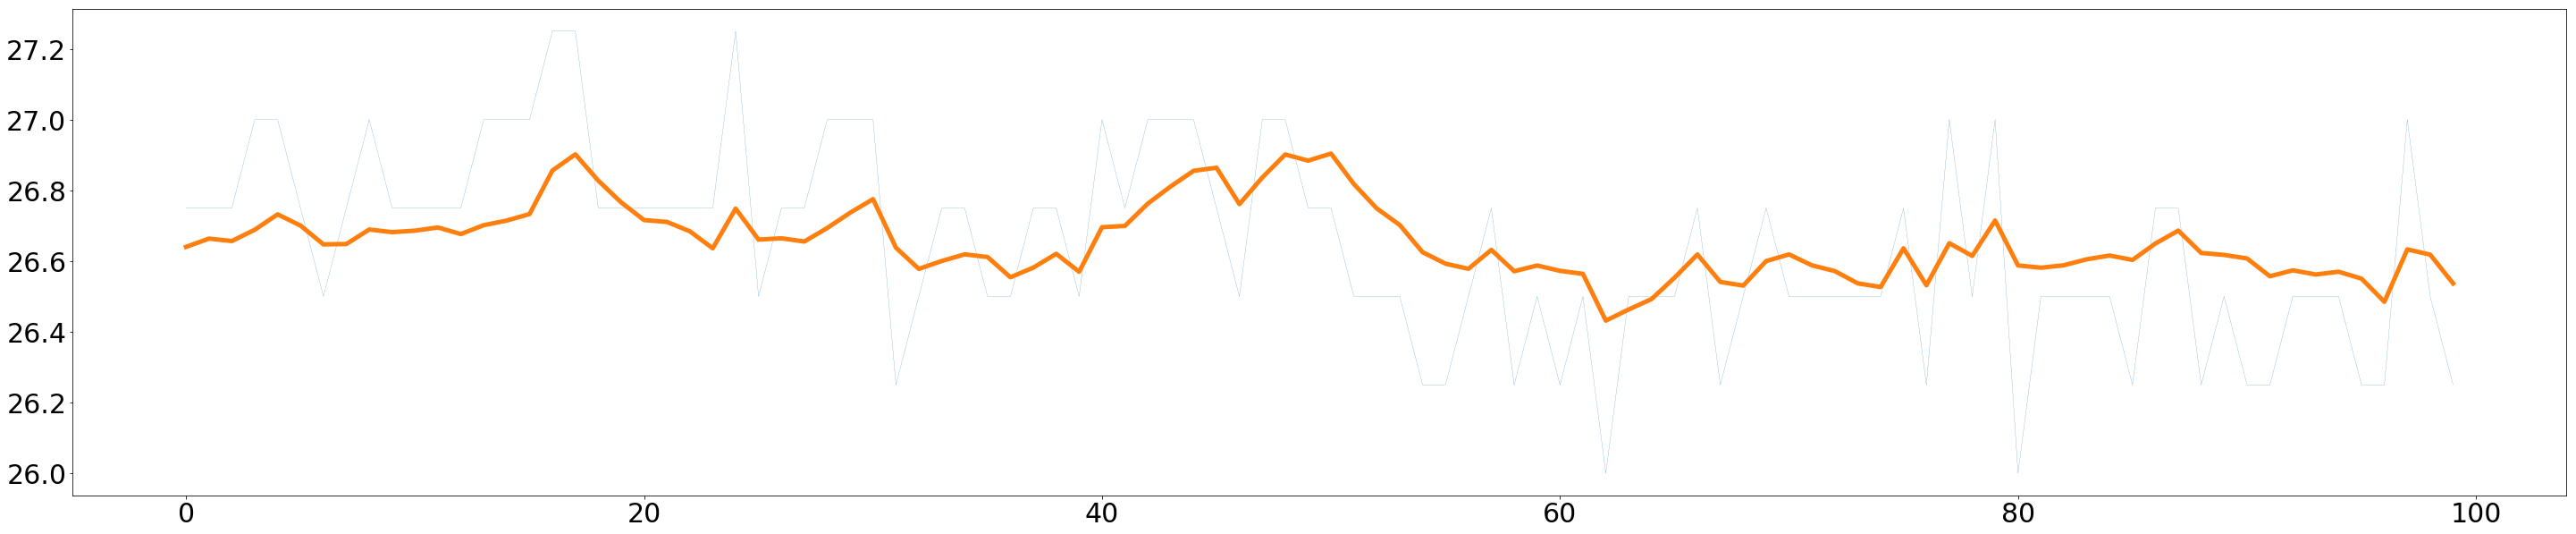

In [898]:
denoised = np.transpose(running_ave,(1,2,0))-ambient_noise
denoised = np.transpose(denoised,(2,0,1))

for i in range(0,8,3):
    plt.figure(figsize=(50, 10))
    plt.rc('xtick', labelsize=30) 
    plt.rc('ytick', labelsize=30) 
    plt.plot(arr1[:,i,i], lw = 0.2)
    plt.plot(denoised[:,i,i], lw = 5)
#     plt.plot(np.ones(100)*time_mean[i,i])

In [899]:
np.amax(arr1)

29.0

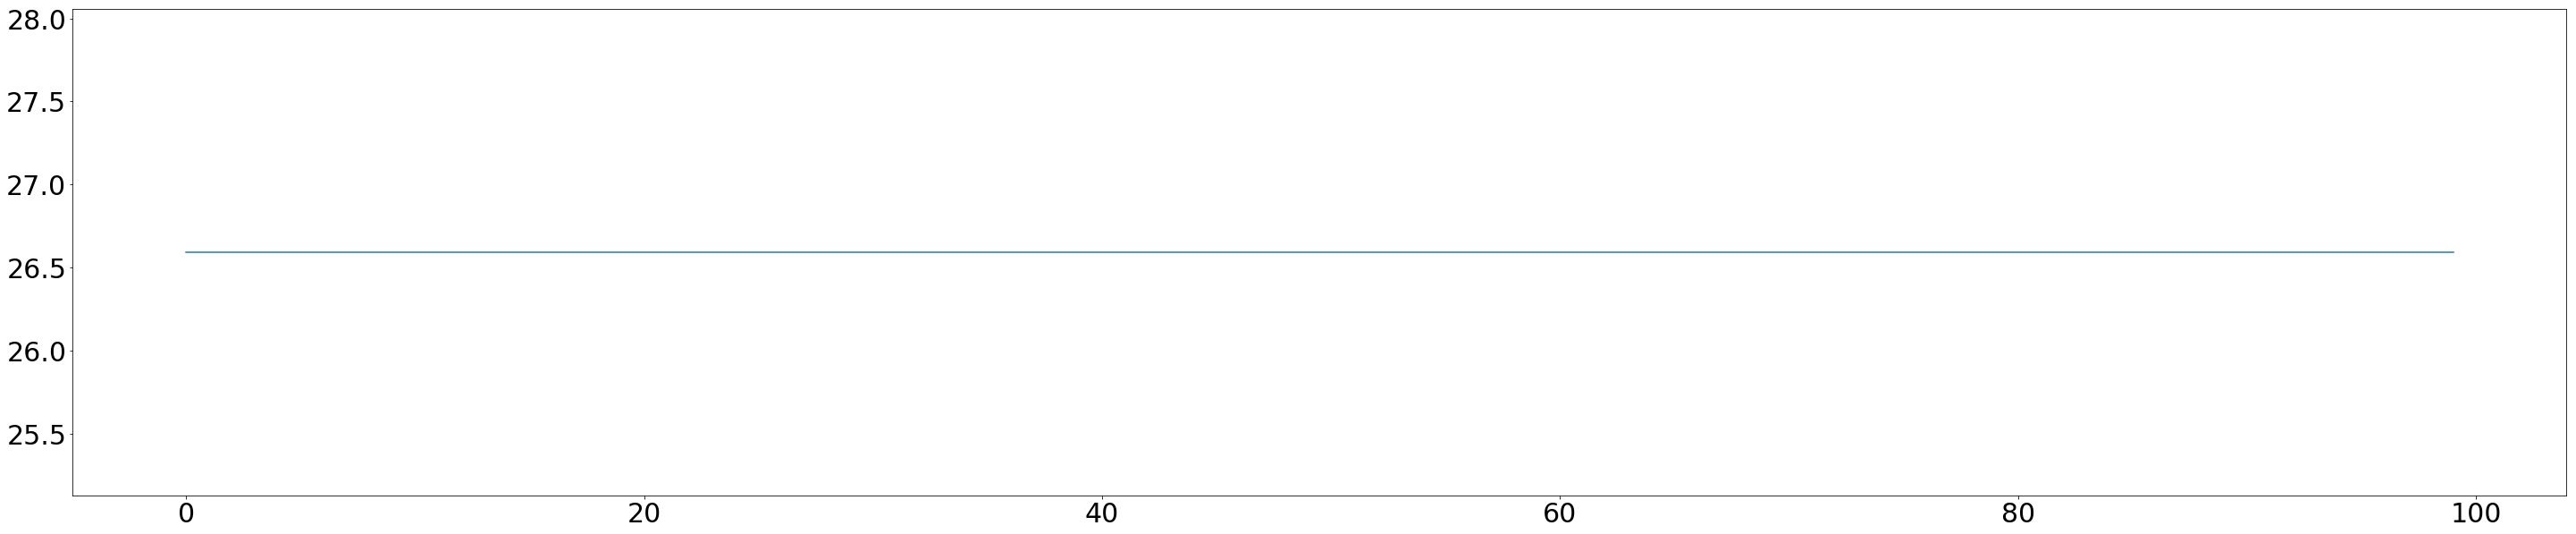

In [900]:
ave = np.mean(denoised, axis = (1,2))
plt.figure(figsize=(50, 10))
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.plot(ave)
plt.show()

In [901]:
time_mean.round(2)

array([[26.15, 26.85, 26.57, 26.64, 26.42, 26.66, 26.85, 26.67],
       [26.46, 28.17, 26.43, 26.38, 26.16, 26.26, 26.28, 26.17],
       [26.7 , 28.39, 27.  , 26.33, 26.1 , 26.07, 26.16, 26.33],
       [27.53, 28.02, 27.45, 26.25, 25.81, 25.91, 26.04, 25.89],
       [27.32, 27.9 , 27.3 , 26.11, 25.94, 25.74, 25.78, 26.43],
       [27.1 , 27.47, 27.34, 26.48, 26.38, 26.55, 26.19, 26.88],
       [26.27, 27.16, 26.97, 26.51, 26.67, 26.74, 26.65, 26.55],
       [25.85, 26.6 , 26.76, 26.36, 26.38, 26.16, 26.29, 26.08]])

In [902]:
spacial_noise = np.array([[-0.61,  0.04, -0.04,  0.14,  0.04,  0.19,  0.41,  0.2 ],
       [-0.43,  0.02, -0.03,  0.12, -0.05,  0.1 ,  0.15,  0.05],
       [-0.37,  0.14, -0.09,  0.12,  0.09,  0.03,  0.11,  0.34],
       [-0.16,  0.01,  0.02,  0.17,  0.03,  0.06,  0.16, -0.02],
       [-0.35,  0.12, -0.07,  0.06,  0.25, -0.06,  0.06,  0.08],
       [-0.45, -0.23, -0.17,  0.1 ,  0.16,  0.24, -0.12,  0.24],
       [-0.53, -0.05,  0.08,  0.1 ,  0.2 ,  0.23,  0.2 ,  0.04],
       [-0.76, -0.37, -0.03,  0.1 ,  0.07, -0.12,  0.09, -0.02]])

In [903]:
super_denoised = denoised-spacial_noise
super_mean = np.mean(super_denoised, axis= 0)
super_mean.round(2)

array([[26.76, 26.81, 26.61, 26.5 , 26.38, 26.47, 26.44, 26.47],
       [26.89, 28.15, 26.46, 26.26, 26.21, 26.16, 26.13, 26.12],
       [27.07, 28.25, 27.09, 26.21, 26.01, 26.04, 26.05, 25.99],
       [27.69, 28.01, 27.43, 26.08, 25.78, 25.85, 25.88, 25.91],
       [27.67, 27.78, 27.37, 26.05, 25.69, 25.8 , 25.72, 26.35],
       [27.55, 27.7 , 27.51, 26.38, 26.22, 26.31, 26.31, 26.64],
       [26.8 , 27.21, 26.89, 26.41, 26.47, 26.51, 26.45, 26.51],
       [26.61, 26.97, 26.79, 26.26, 26.31, 26.28, 26.2 , 26.1 ]])

In [904]:
np.sum(np.power(time_mean-np.mean(arr1), 2))/64

0.3436048864124474

In [905]:
np.sum(np.power(super_mean-np.mean(arr1), 2))/64

0.39362493889166006

In [906]:
st.skew(super_denoised[:,0,0])

-0.0822931605202883

In [907]:
COLORDEPTH = 1024
MINTEMP = 26.
MAXTEMP = 32.
def map_value(x, in_min, in_max, out_min, out_max):
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

In [908]:

points = [(math.floor(ix / 8), (ix % 8)) for ix in range(0, 64)]
grid_x, grid_y = np.mgrid[0:7:64j, 0:7:64j]


n_pixels = map_value(np.amax(arr1,axis = 0), MINTEMP, MAXTEMP, 0, COLORDEPTH - 1).reshape(-1)
bicubic = griddata(points, n_pixels, (grid_x, grid_y), method='cubic')
bicubic = np.uint8(np.clip(bicubic,0,COLORDEPTH- 1)/(COLORDEPTH- 1)*255)
frame = cv2.applyColorMap(255-bicubic, cv2.COLORMAP_JET)

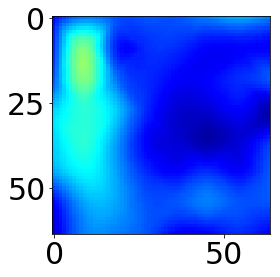

In [909]:
plt.imshow(frame)

In [910]:
deconv = np.zeros([8,8,8,8])
s = 0.55
for i in range(8):
    for j in range(8):
        weight = 0
        for m in range(8):
            for n in range(8):
                deconv[i,j,m,n] = math.exp(-math.pow(np.linalg.norm(np.array([i,j]-np.array([m,n])))/s,2)*0.5)
                weight += deconv[i,j,m,n]
        deconv[i,j] /= weight

In [911]:
deconv = np.reshape(deconv,(64,64))
samp = np.reshape(np.amax(arr1,axis = 0),(64))
ans = np.linalg.solve(deconv,samp)

In [912]:
np.reshape(ans,(8,8)).round(2)

array([[26.6 , 27.21, 27.35, 27.32, 27.22, 27.68, 28.14, 27.63],
       [26.36, 30.54, 26.09, 27.08, 27.07, 26.48, 26.43, 26.38],
       [26.58, 29.9 , 27.13, 27.03, 26.7 , 26.8 , 27.1 , 27.81],
       [28.12, 28.44, 28.34, 26.96, 26.35, 26.46, 27.01, 25.56],
       [27.81, 28.88, 27.68, 26.44, 26.59, 25.88, 26.34, 27.35],
       [27.83, 28.49, 27.77, 26.97, 26.49, 27.26, 26.44, 27.4 ],
       [26.31, 27.92, 27.92, 27.15, 27.47, 27.91, 27.34, 27.38],
       [26.25, 27.7 , 27.41, 27.35, 26.49, 26.46, 27.08, 26.54]])

In [913]:
bicubic = griddata(points, ans, (grid_x, grid_y), method='cubic')
n_pixels = map_value(bicubic, MINTEMP, MAXTEMP, 0, COLORDEPTH - 1)
new = np.uint8(np.clip(n_pixels,0,COLORDEPTH- 1)/(COLORDEPTH- 1)*255)
frame = cv2.applyColorMap(255-new, cv2.COLORMAP_JET)

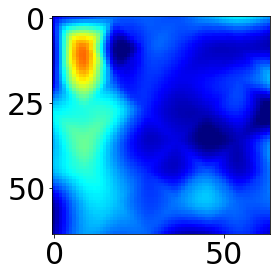

In [914]:
plt.imshow(frame)

In [915]:
np.amax(bicubic)

30.64858972679976

In [916]:
np.amax(bicubic)-np.amin(bicubic)

5.098388148644354

In [917]:
np.amax(np.amax(arr1,axis = 0))-np.amin(np.amax(arr1,axis = 0))

2.75

In [695]:
size =64
deconv = np.zeros([size,size,size,size])
s = 0.95
for i in range(size):
    for j in range(size):
        weight = 0
        for m in range(size):
            for n in range(size):
                deconv[i,j,m,n] = math.exp(-math.pow(np.linalg.norm(np.array([i,j]-np.array([m,n])))/s,2)*0.5)
                weight += deconv[i,j,m,n]
        deconv[i,j] /= weight

KeyboardInterrupt: 

In [ ]:
deconv = np.reshape(deconv,(4096,4096))
samp = griddata(points, np.reshape(arr1[0],(64)), (grid_x, grid_y), method='cubic').reshape(-1)
ans = np.linalg.solve(deconv,samp)

In [ ]:
n_pixels = map_value(ans, MINTEMP, MAXTEMP, 0, COLORDEPTH - 1).reshape(size,size)
bicubic = np.uint8(np.clip(n_pixels,0,COLORDEPTH- 1)/(COLORDEPTH- 1)*255)
frame = cv2.applyColorMap(255-bicubic, cv2.COLORMAP_JET)

In [ ]:
plt.imshow(frame)

In [143]:
import sys
np.set_printoptions(threshold=sys.maxsize)
ans

array([25.47319521, 25.65815993, 25.80523917, 25.9558056 , 26.09823055,
       26.22822372, 26.34052963, 26.43022698, 26.49224046, 26.5214619 ,
       26.51533675, 26.4792348 , 26.41981069, 26.34478924, 26.2615221 ,
       26.17725205, 26.10078844, 26.03593695, 25.99455162, 25.98837051,
       26.00244377, 26.03088567, 26.07057009, 26.11600263, 26.16246502,
       26.20520071, 26.23921983, 26.26014649, 26.2650398 , 26.25682678,
       26.24018362, 26.22018046, 26.2017116 , 26.18962094, 26.1895974 ,
       26.20462594, 26.24193174, 26.30904552, 26.3961414 , 26.49766389,
       26.60641602, 26.71561555, 26.8185582 , 26.90726212, 26.97791796,
       27.0196363 , 27.0206509 , 26.99428982, 26.94768675, 26.88415701,
       26.80939016, 26.72831959, 26.64592281, 26.56752223, 26.49731519,
       26.43942272, 26.3936052 , 26.35763401, 26.32980993, 26.30832874,
       26.2914414 , 26.27691414, 26.26448228, 26.24723314, 25.4579515 ,
       25.61280538, 25.73827944, 25.87867677, 26.00875372, 26.13